In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import time 
import scipy
import investpy
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash

# Import data FT

In [2]:
ft1 = yf.download("BEM.BK EGCO.BK AOT.BK III.BK JWD.BK CK.BK UNIQ.BK SI=F PL=F HG=F",start="2010-01-02",end="2020-08-31")
ft1.fillna(method='bfill', inplace=True)
ft1 = ft1.dropna()
ft1 = ft1['Adj Close']


[*********************100%***********************]  10 of 10 completed


In [3]:
ft2 = yf.download("CC=F KC=F SB=F ZL=F GF=F LE=F HE=F ZM=F ZR=F",start="2010-01-02",end="2020-08-31")
ft2.fillna(method='bfill', inplace=True)
ft2 = ft2.dropna()
ft2 = ft2['Adj Close']


[*********************100%***********************]  9 of 9 completed


In [4]:
ft3 = yf.download("CL=F RB=F HO=F NG=F ESSO.BK BCP.BK",start="2010-01-02",end="2020-08-31")
ft3.fillna(method='bfill', inplace=True)
ft3 = ft3.dropna()
ft3 = ft3['Adj Close']


[*********************100%***********************]  6 of 6 completed


In [5]:
ft4 = yf.download("TNPC.BK TOA.BK DRT.BK STEC.BK TPOLY.BK SI=F PL=F HG=F",start="2010-01-02",end="2020-08-31")
ft4.fillna(method='bfill', inplace=True)
ft4 = ft4.dropna()
ft4 = ft4['Adj Close']


[*********************100%***********************]  8 of 8 completed


In [6]:
ft5 = yf.download("LST.BK VPO.BK UVAN.BK UPOIC.BK ZM=F ZL=F ZS=F",start="2010-01-02",end="2020-08-31")
ft5.fillna(method='bfill', inplace=True)
ft5 = ft5.dropna()
ft5 = ft5['Adj Close']


[*********************100%***********************]  7 of 7 completed


#  Import data ST

In [7]:
st1 = yf.download("PTTEP.BK TVO.BK CPF.BK SCC.BK BTS.BK",start="2010-01-02",end="2020-08-31")
st1.fillna(method='bfill', inplace=True)
st1 = st1.dropna()
st1 = st1['Adj Close']


[*********************100%***********************]  5 of 5 completed


In [8]:
st2 = yf.download("PTTEP.BK TVO.BK CPF.BK BTS.BK TNPC.BK",start="2010-01-02",end="2020-08-31")
st2.fillna(method='bfill', inplace=True)
st2 = st2.dropna()
st2 = st2['Adj Close']


[*********************100%***********************]  5 of 5 completed


In [9]:
st3 = yf.download("PTTEP.BK TVO.BK SCC.BK BTS.BK TNPC.BK",start="2010-01-02",end="2020-08-31")
st3.fillna(method='bfill', inplace=True)
st3 = st3.dropna()
st3 = st3['Adj Close']


[*********************100%***********************]  5 of 5 completed


In [10]:
st4 = yf.download("PTTEP.BK TVO.BK CPF.BK SCC.BK TNPC.BK",start="2010-01-02",end="2020-08-31")
st4.fillna(method='bfill', inplace=True)
st4 = st4.dropna()
st4 = st4['Adj Close']


[*********************100%***********************]  5 of 5 completed


In [11]:
st5 = yf.download("PTTEP.BK TVO.BK SCC.BK BTS.BK TNPC.BK",start="2010-01-02",end="2020-08-31")
st5.fillna(method='bfill', inplace=True)
st5 = st5.dropna()
st5 = st5['Adj Close']


[*********************100%***********************]  5 of 5 completed


In [12]:
BTS = ft1.join(st1['BTS.BK'])
CPF = ft2.join(st2['CPF.BK'])
PTTEP = ft3.join(st3['PTTEP.BK'])
SCC = ft4.join(st4['SCC.BK'])
TVO = ft5.join(st5['TVO.BK'])

In [13]:
BTS = BTS.dropna()
CPF = CPF.dropna()
PTTEP = PTTEP.dropna()
SCC = SCC.dropna()
TVO = TVO.dropna()

In [14]:
list_of_stock=['BTS' ,
'CPF' ,
'PTTEP' ,
'SCC' ,
'TVO' ]

In [15]:
BTS

,AOT.BK,BEM.BK,CK.BK,EGCO.BK,HG=F,III.BK,JWD.BK,PL=F,SI=F,UNIQ.BK,BTS.BK
Date,,,,,,,,,,,
2010-01-04,3.245882,1.677729,4.719489,51.251045,3.3880,9.071856,8.132977,1517.300049,17.440001,5.188159,1.981645
2010-01-05,3.266824,1.677729,4.643977,51.568375,3.3960,9.071856,8.132977,1530.800049,17.781000,5.151363,1.981645
2010-01-06,3.308706,1.677729,4.681734,51.092346,3.4775,9.071856,8.132977,1552.199951,18.163000,5.151363,1.948617
2010-01-07,3.350588,1.698967,4.643977,51.092346,3.4115,9.071856,8.132977,1553.000000,18.333000,5.151363,1.948617
2010-01-08,3.350588,1.677729,4.681734,51.092346,3.3880,9.071856,8.132977,1564.599976,18.458000,5.188159,1.948617
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-24,56.421200,9.250000,17.799999,220.557617,2.9225,4.840000,7.250000,920.799988,26.587999,4.820000,10.239175
2020-08-25,56.669750,9.250000,17.700001,220.557617,2.9310,4.760000,7.350000,930.599976,26.254000,4.840000,10.239175
2020-08-26,56.669750,9.250000,17.900000,220.557617,2.9595,4.780000,7.600000,936.400024,27.430000,4.880000,10.534535


In [15]:
CPF

,CC=F,GF=F,HE=F,KC=F,LE=F,SB=F,ZL=F,ZM=F,ZR=F,CPF.BK
Date,,,,,,,,,,
2010-01-04,3256.0,95.875000,65.849998,141.850006,85.375000,27.620001,40.900002,316.000000,1481.0,7.740198
2010-01-05,3321.0,96.550003,67.599998,141.000000,86.324997,27.639999,40.709999,319.399994,1477.0,7.603206
2010-01-06,3292.0,96.300003,66.574997,141.600006,85.949997,28.410000,40.669998,317.899994,1478.0,7.740198
2010-01-07,3309.0,96.449997,67.099998,141.899994,85.925003,28.000000,39.990002,307.000000,1471.5,7.740198
2010-01-08,3296.0,96.349998,67.250000,145.350006,85.824997,27.530001,39.529999,306.799988,1470.5,8.014190
...,...,...,...,...,...,...,...,...,...,...
2020-08-24,2509.0,142.000000,54.599998,120.250000,105.574997,12.710000,31.660000,289.100006,1226.0,33.349998
2020-08-25,2537.0,142.250000,55.950001,123.199997,105.500000,12.760000,31.980000,291.600006,1202.0,33.102962
2020-08-26,2526.0,142.475006,55.549999,122.800003,104.050003,12.580000,32.240002,291.500000,1225.5,33.349998


In [16]:
PTTEP

,BCP.BK,CL=F,ESSO.BK,HO=F,NG=F,RB=F,PTTEP.BK
Date,,,,,,,
2010-01-04,8.506100,81.510002,5.389438,2.1905,5.884,2.1044,91.200439
2010-01-05,8.563188,81.769997,5.389438,2.1941,5.637,2.1250,92.137413
2010-01-06,8.506100,83.180000,5.389438,2.2032,6.009,2.1366,93.074425
2010-01-07,8.506100,82.660004,5.431874,2.1836,5.806,2.1349,92.137413
2010-01-08,8.449010,82.750000,5.431874,2.2003,5.749,2.1553,92.762108
...,...,...,...,...,...,...,...
2020-08-24,17.352982,42.619999,6.700000,1.2476,2.513,1.3671,88.335869
2020-08-25,17.057192,43.349998,6.900000,1.2601,2.489,1.3959,89.067940
2020-08-26,17.254385,43.389999,6.850000,1.2447,2.461,1.3606,89.067940


In [17]:
SCC

,DRT.BK,HG=F,PL=F,SI=F,STEC.BK,TNPC.BK,TOA.BK,TPOLY.BK,SCC.BK
Date,,,,,,,,,
2010-01-04,1.539673,3.3880,1517.300049,17.440001,4.059849,0.636531,31.100529,1.504833,158.971527
2010-01-05,1.539673,3.3960,1530.800049,17.781000,3.996414,0.636531,31.100529,1.518897,158.971527
2010-01-06,1.539673,3.4775,1552.199951,18.163000,3.964696,0.636531,31.100529,1.532961,156.924713
2010-01-07,1.539673,3.4115,1553.000000,18.333000,3.996414,0.636531,31.100529,1.532961,154.195557
2010-01-08,1.539673,3.3880,1564.599976,18.458000,3.964696,0.636531,31.100529,1.532961,154.877853
...,...,...,...,...,...,...,...,...,...
2020-08-24,5.946290,2.9225,920.799988,26.587999,13.000000,0.700000,39.478291,1.850000,361.000000
2020-08-25,5.993111,2.9310,930.599976,26.254000,13.000000,0.700000,39.230000,1.900000,356.000000
2020-08-26,6.086753,2.9595,936.400024,27.430000,13.200000,0.710000,39.230000,1.940000,351.000000


In [18]:
TVO

,LST.BK,UPOIC.BK,UVAN.BK,VPO.BK,ZL=F,ZM=F,ZS=F,TVO.BK
Date,,,,,,,,
2010-01-04,2.148395,4.035191,4.005896,2.881667,40.900002,316.000000,1049.50,8.706041
2010-01-05,2.113744,4.035191,3.957044,2.881667,40.709999,319.399994,1052.25,8.706041
2010-01-06,2.136845,4.066231,3.957044,2.881667,40.669998,317.899994,1050.50,8.754680
2010-01-07,2.113744,4.035191,3.932618,2.881667,39.990002,307.000000,1017.75,8.803315
2010-01-08,2.113744,4.035191,3.957044,2.881667,39.529999,306.799988,1013.00,8.851954
...,...,...,...,...,...,...,...,...
2020-08-24,4.147500,3.200000,4.276598,0.360000,31.660000,289.100006,899.75,26.608824
2020-08-25,4.147500,3.420000,4.352290,0.360000,31.980000,291.600006,913.75,26.608824
2020-08-26,4.204839,3.260000,4.390136,0.350000,32.240002,291.500000,919.50,27.341177


# Visualize the Time Series

In [16]:
# fig, axes = plt.subplots(nrows=len(BTS.columns), ncols=1, dpi=120, figsize=(10,16))
# for i, ax in enumerate(axes.flatten()):
#     data = BTS[BTS.columns[i]]
#     ax.plot(data, color='red', linewidth=1)
#     # Decorations
#     ax.set_title(BTS.columns[i])
#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticks_position('none')
#     ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)

# plt.tight_layout();

# Correlation

In [17]:
BTS_cor = BTS.corr().loc[['BTS.BK']]
CPF_cor = CPF.corr().loc[['CPF.BK']]
PTTEP_cor = PTTEP.corr().loc[['PTTEP.BK']]
SCC_cor = SCC.corr().loc[['SCC.BK']]
TVO_cor = TVO.corr().loc[['TVO.BK']]

In [18]:
BTS_cor

,AOT.BK,BEM.BK,CK.BK,EGCO.BK,HG=F,III.BK,JWD.BK,PL=F,SI=F,UNIQ.BK,BTS.BK
BTS.BK,0.900401,0.918052,0.768634,0.944457,-0.681447,-0.714469,-0.206593,-0.842372,-0.645551,0.537541,1.0


# Testing Causation using Granger’s Causality Test

In [19]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    Stock = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in Stock.columns:
        for r in Stock.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            Stock.loc[r, c] = min_p_value
    Stock.columns = [var + '_x' for var in variables]
    Stock.index = [var + '_y' for var in variables]
    return Stock

 

In [20]:
BTS_GC = grangers_causation_matrix(BTS, variables = BTS.columns).loc[['BTS.BK_y']] 
CPF_GC = grangers_causation_matrix(CPF, variables = CPF.columns).loc[['CPF.BK_y']] 
PTTEP_GC = grangers_causation_matrix(PTTEP, variables = PTTEP.columns).loc[['PTTEP.BK_y']] 
SCC_GC = grangers_causation_matrix(SCC, variables = SCC.columns).loc[['SCC.BK_y']] 
TVO_GC = grangers_causation_matrix(TVO, variables = TVO.columns).loc[['TVO.BK_y']] 

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 5, but rank is 1

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 5, but rank is 1

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 6, but rank is 1



In [22]:
TVO_GC

,LST.BK_x,UPOIC.BK_x,UVAN.BK_x,VPO.BK_x,ZL=F_x,ZM=F_x,ZS=F_x,TVO.BK_x
TVO.BK_y,0.0336,0.1569,0.4463,0.0052,0.0,0.0003,0.0,1.0


# Cointegration Test

In [389]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(Stock, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(Stock,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(Stock.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
    print('\n')

# cointegration_test(PTT)

In [24]:
BTS['01-01-2019':]

,AOT.BK,BEM.BK,CK.BK,EGCO.BK,HG=F,III.BK,JWD.BK,PL=F,SI=F,UNIQ.BK,BTS.BK
Date,,,,,,,,,,,
2019-01-02,62.977455,9.626030,23.722597,229.992020,2.6250,4.632911,6.299685,799.099976,15.542000,7.870647,8.645051
2019-01-03,62.242313,9.577659,23.913908,231.861877,2.5705,4.689181,6.299685,794.500000,15.706000,7.828104,8.645051
2019-01-04,63.222504,9.432543,23.913908,236.536530,2.6515,4.689181,6.299685,822.000000,15.695000,7.955736,8.645051
2019-01-07,62.977455,9.529286,24.631327,230.926987,2.6410,4.736073,6.299685,818.400024,15.669000,8.211000,8.645051
2019-01-08,63.467552,9.529286,24.153048,230.926987,2.6605,4.970532,6.299685,816.500000,15.626000,8.296088,8.645051
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-24,56.421200,9.250000,17.799999,220.557617,2.9225,4.840000,7.250000,920.799988,26.587999,4.820000,10.239175
2020-08-25,56.669750,9.250000,17.700001,220.557617,2.9310,4.760000,7.350000,930.599976,26.254000,4.840000,10.239175
2020-08-26,56.669750,9.250000,17.900000,220.557617,2.9595,4.780000,7.600000,936.400024,27.430000,4.880000,10.534535


In [390]:
BTS_CT = cointegration_test(BTS)
CPF_CT = cointegration_test(CPF)
PTTEP_CT = cointegration_test(PTTEP)
SCC_CT = cointegration_test(SCC)
TVO_CT = cointegration_test(TVO)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
AOT.BK ::  267.93    > 263.2603  =>   True
BEM.BK ::  202.36    > 219.4051  =>   False
CK.BK  ::  149.5     > 179.5199  =>   False
EGCO.BK ::  102.19    > 143.6691  =>   False
HG=F   ::  74.08     > 111.7797  =>   False
III.BK ::  47.36     > 83.9383   =>   False
JWD.BK ::  32.74     > 60.0627   =>   False
PL=F   ::  19.1      > 40.1749   =>   False
SI=F   ::  9.28      > 24.2761   =>   False
UNIQ.BK ::  4.54      > 12.3212   =>   False
BTS.BK ::  0.07      > 4.1296    =>   False


Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
CC=F   ::  229.88    > 219.4051  =>   True
GF=F   ::  179.91    > 179.5199  =>   True
HE=F   ::  137.0     > 143.6691  =>   False
KC=F   ::  104.69    > 111.7797  =>   False
LE=F   ::  76.11     > 83.9383   =>   False
SB=F   ::  48.14     > 60.0627   =>   False
ZL=F   ::  29.08     > 40.1749   =>   False
ZM=F   ::  13.37     > 24.276

# Split the Series into Training and Testing Data

In [391]:
nobs = 7
BTS_train, BTS_test = BTS[0:-nobs], BTS[-nobs:]
CPF_train, CPF_test = CPF[0:-nobs], CPF[-nobs:]
PTTEP_train, PTTEP_test = PTTEP[0:-nobs], PTTEP[-nobs:]
SCC_train, SCC_test = SCC[0:-nobs], SCC[-nobs:]
TVO_train, TVO_test = TVO[0:-nobs], TVO[-nobs:]
# # Check size
# print(ft_train.shape)  
# print(ft_test.shape)  
# ft_train

# Check for Stationarity and Make the Time Series Stationary

In [392]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [393]:
# 1st difference
BTS_differenced = BTS_train.diff().dropna()

In [394]:
# 1st difference
CPF_differenced = CPF_train.diff().dropna()

In [395]:
# 1st difference
PTTEP_differenced = PTTEP_train.diff().dropna()

In [396]:
# 1st difference
SCC_differenced = SCC_train.diff().dropna()

In [397]:
# 1st difference
TVO_differenced = TVO_train.diff().dropna()

In [398]:
BTS_differenced

,AOT.BK,BEM.BK,CK.BK,EGCO.BK,HG=F,III.BK,JWD.BK,PL=F,SI=F,UNIQ.BK,BTS.BK
Date,,,,,,,,,,,
2010-01-05,0.020942,0.000000,-0.075511,0.317329,0.0080,0.00,0.00,13.500000,0.341000,-0.036797,0.000000
2010-01-06,0.041882,0.000000,0.037756,-0.476028,0.0815,0.00,0.00,21.399902,0.382000,0.000000,-0.033027
2010-01-07,0.041882,0.021238,-0.037756,0.000000,-0.0660,0.00,0.00,0.800049,0.170000,0.000000,0.000000
2010-01-08,0.000000,-0.021238,0.037756,0.000000,-0.0235,0.00,0.00,11.599976,0.125000,0.036797,0.000000
2010-01-11,0.020941,0.000000,0.037755,0.317360,0.0405,0.00,0.00,23.700073,0.225000,0.110385,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-13,2.982620,0.200000,-0.500000,0.967361,-0.0680,-0.02,0.30,11.500000,1.657000,0.000000,0.295360
2020-08-14,-2.236969,0.050000,0.200001,-3.869431,0.0520,0.08,-0.15,-23.699951,-1.629000,-0.050000,-0.295360
2020-08-17,0.248554,-0.150000,0.199999,0.967346,0.0420,-0.10,0.40,8.899963,1.577999,-0.050000,-0.196908


# Select the Order (P) of VAR model

In [399]:
BTS_model = VAR(BTS_differenced)
CPF_model = VAR(CPF_differenced)
PTTEP_model = VAR(PTTEP_differenced)
SCC_model = VAR(SCC_differenced)
TVO_model = VAR(TVO_differenced)
# for i in list(range(1,24)):
#     result = model.fit(i)
#     print('Lag Order =', i)
#     print('AIC : ', result.aic)
#     print('BIC : ', result.bic)
#     print('FPE : ', result.fpe)
#     print('HQIC: ', result.hqic, '\n')

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so 

In [400]:
# #Lag Order = 3
# x = model.select_order(maxlags=4)
# x.summary()

# Train the VAR Model of Selected Order(p)

In [401]:
#test model fit
BTSmodel_fitted = BTS_model.fit(2)
CPFmodel_fitted = CPF_model.fit(1)
PTTEPmodel_fitted = PTTEP_model.fit(3)
SCCmodel_fitted = SCC_model.fit(2)
TVOmodel_fitted = TVO_model.fit(1)
# model_fitted.summary()

# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [402]:
from statsmodels.stats.stattools import durbin_watson

BTSout = durbin_watson(BTSmodel_fitted.resid)
CPFout = durbin_watson(CPFmodel_fitted.resid)
PTTEPout = durbin_watson(PTTEPmodel_fitted.resid)
SCCout = durbin_watson(SCCmodel_fitted.resid)
TVOout = durbin_watson(TVOmodel_fitted.resid)
print('BTS')
for col, val in zip(BTS.columns, BTSout):
    print( col,':', round(val, 2))
print('\n')
print('CPF')
for col, val in zip(CPF.columns, CPFout):
    print( col,':', round(val, 2))
print('\n')
print('PTTEP')
for col, val in zip(PTTEP.columns, PTTEPout):
    print( col,':', round(val, 2))
print('\n')
print('SCC')
for col, val in zip(SCC.columns, SCCout):
    print( col,':', round(val, 2))
print('\n')
print('TVO')
for col, val in zip(TVO.columns, TVOout):
    print( col,':', round(val, 2))

BTS
AOT.BK : 2.0
BEM.BK : 2.01
CK.BK : 1.99
EGCO.BK : 2.0
HG=F : 2.0
III.BK : 2.0
JWD.BK : 1.99
PL=F : 2.01
SI=F : 2.0
UNIQ.BK : 2.0
BTS.BK : 2.01


CPF
CC=F : 2.0
GF=F : 2.0
HE=F : 2.0
KC=F : 2.0
LE=F : 2.0
SB=F : 2.0
ZL=F : 2.0
ZM=F : 2.0
ZR=F : 1.99
CPF.BK : 2.0


PTTEP
BCP.BK : 2.01
CL=F : 2.02
ESSO.BK : 2.0
HO=F : 2.0
NG=F : 2.0
RB=F : 2.0
PTTEP.BK : 2.0


SCC
DRT.BK : 2.0
HG=F : 2.0
PL=F : 2.0
SI=F : 2.0
STEC.BK : 2.0
TNPC.BK : 2.0
TOA.BK : 2.01
TPOLY.BK : 1.99
SCC.BK : 2.0


TVO
LST.BK : 2.01
UPOIC.BK : 2.03
UVAN.BK : 2.01
VPO.BK : 2.01
ZL=F : 2.0
ZM=F : 1.99
ZS=F : 1.99
TVO.BK : 2.01


# Forecast VAR model using statsmodels

In [403]:
# Get the lag order
BTS_order = BTSmodel_fitted.k_ar
CPF_order = CPFmodel_fitted.k_ar
PTTEP_order = PTTEPmodel_fitted.k_ar
SCC_order = SCCmodel_fitted.k_ar
TVO_order = TVOmodel_fitted.k_ar


# Input data for forecasting
forecast_input_BTS = BTS_differenced.values[-BTS_order:]
forecast_input_CPF = CPF_differenced.values[-CPF_order:]
forecast_input_PTTEP = PTTEP_differenced.values[-PTTEP_order:]
forecast_input_SCC = SCC_differenced.values[-SCC_order:]
forecast_input_TVO = TVO_differenced.values[-TVO_order:]

In [404]:
# Forecast
BTS_fc = BTSmodel_fitted.forecast(y=forecast_input_BTS, steps=nobs)
BTS_forecast = pd.DataFrame(BTS_fc, index=BTS.index[-nobs:], columns=BTS.columns + '_1d')

CPF_fc = CPFmodel_fitted.forecast(y=forecast_input_CPF, steps=nobs)
CPF_forecast = pd.DataFrame(CPF_fc, index=CPF.index[-nobs:], columns=CPF.columns + '_1d')

PTTEP_fc = PTTEPmodel_fitted.forecast(y=forecast_input_PTTEP, steps=nobs)
PTTEP_forecast = pd.DataFrame(PTTEP_fc, index=PTTEP.index[-nobs:], columns=PTTEP.columns + '_1d')

SCC_fc = SCCmodel_fitted.forecast(y=forecast_input_SCC, steps=nobs)
SCC_forecast = pd.DataFrame(SCC_fc, index=SCC.index[-nobs:], columns=SCC.columns + '_1d')

TVO_fc = TVOmodel_fitted.forecast(y=forecast_input_TVO, steps=nobs)
TVO_forecast = pd.DataFrame(TVO_fc, index=TVO.index[-nobs:], columns=TVO.columns + '_1d')
# ft_forecast


# Invert the transformation to get the real forecast

In [405]:
def invert_transformation(ft_train, ft_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    ft_fc = ft_forecast.copy()
    columns = ft_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            ft_fc[str(col)+'_1d'] = (ft_train[col].iloc[-1]-ft_train[col].iloc[-2]) + ft_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        ft_fc[str(col)+'_forecast'] = ft_train[col].iloc[-1] + ft_fc[str(col)+'_1d'].cumsum()
    return ft_fc

In [406]:
BTS_results = invert_transformation(BTS_train, BTS_forecast, second_diff=False)        
BTS_results.loc[:, ["BTS.BK_forecast" ]]

,BTS.BK_forecast
Date,
2020-08-20,10.201915
2020-08-21,10.189440
2020-08-24,10.192803
2020-08-25,10.195463
2020-08-26,10.198704
2020-08-27,10.201795
2020-08-28,10.204961


In [407]:
CPF_results = invert_transformation(CPF_train, CPF_forecast, second_diff=False)        
CPF_results.loc[:, ["CPF.BK_forecast" ]]

,CPF.BK_forecast
Date,
2020-08-20,32.914395
2020-08-21,32.923416
2020-08-24,32.933644
2020-08-25,32.943796
2020-08-26,32.953958
2020-08-27,32.964120
2020-08-28,32.974282


In [408]:
PTTEP_results = invert_transformation(PTTEP_train, PTTEP_forecast, second_diff=False)        
PTTEP_results.loc[:, ["PTTEP.BK_forecast" ]]

,PTTEP.BK_forecast
Date,
2020-08-20,89.911186
2020-08-21,89.798378
2020-08-24,89.798991
2020-08-25,89.790227
2020-08-26,89.792309
2020-08-27,89.790474
2020-08-28,89.789277


In [409]:
SCC_results = invert_transformation(SCC_train, SCC_forecast, second_diff=False)        
SCC_results.loc[:, ["SCC.BK_forecast" ]]

,SCC.BK_forecast
Date,
2020-08-20,364.162040
2020-08-21,364.232649
2020-08-24,364.278452
2020-08-25,364.364269
2020-08-26,364.444167
2020-08-27,364.525794
2020-08-28,364.604729


In [410]:
TVO_results = invert_transformation(TVO_train, TVO_forecast, second_diff=False)        
TVO_results.loc[:, ["TVO.BK_forecast" ]]

,TVO.BK_forecast
Date,
2020-08-20,26.614412
2020-08-21,26.623746
2020-08-24,26.630110
2020-08-25,26.637134
2020-08-26,26.644011
2020-08-27,26.650916
2020-08-28,26.657816


# Function Evaluate

In [411]:


# fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(10,2))
# ft_results['BTS.BK'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
# ft_test['BTS.BK'].plot(legend=True );
# axes.set_title('BTS.BK' + ": Forecast vs Actuals")
# axes.xaxis.set_ticks_position('none')
# axes.yaxis.set_ticks_position('none')
# axes.spines["top"].set_alpha(0)
# axes.tick_params(labelsize=6)

from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
#   
#     n = train.shape[0]
#     d = np.abs(  np.diff( train) ).sum()/(n-1)
    
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
#     mase = np.mean(np.abs(actual - forecast ))/d
    
#     me = np.mean(forecast - actual)             # ME
#     mpe = np.mean((forecast - actual)/actual)   # MPE
#     corr = np.corrcoef(forecast, actual)[0,1]   # corr
#     mins = np.amin(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     maxs = np.amax(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mae (Mean Absolute Error)': mae, 
            'rmse (Root Mean Square Error)':rmse,
            'mape (Mean absolute percentage error)':mape*100})

# print('Forecast Accuracy of: BTS')
# accuracy_prod = forecast_accuracy(ft_results['BTS.BK_forecast'].values, ft_test['BTS.BK'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))
# plt.tight_layout();



#  Plot of Forecast vs Actuals ( Forecast 1 year )

In [581]:
def forecast_stock1Y(stock,time,stock_forecast,order) :
    start = 0
    end = time
    nobs = 7
    max_row = len(stock) - end

    forecast_results = pd.DataFrame()
    forecast_test = stock[end:]
    
    

    while max_row > 0 :
        if(max_row < nobs):
            ft_train, ft_test = stock[start:end] , stock[end:end+max_row]
        else :
            ft_train, ft_test = stock[start:end] , stock[end:end+nobs]

        ft_differenced = ft_train.diff().dropna()

        model = VAR(ft_differenced)

        model_fitted = model.fit(order)
        model_fitted.summary()

        lag_order = model_fitted.k_ar

        # Input data for forecasting
        forecast_input = ft_differenced.values[-lag_order:]


        # Forecast
        if(max_row < nobs):
            fc = model_fitted.forecast(y=forecast_input, steps=max_row)
            ft_forecast = pd.DataFrame(fc, index=stock.index[end:end+max_row], columns=stock.columns + '_1d')
        else:
            fc = model_fitted.forecast(y=forecast_input, steps=nobs)
            ft_forecast = pd.DataFrame(fc, index=stock.index[end:end+nobs], columns=stock.columns + '_1d')


        ft_results = invert_transformation(ft_train, ft_forecast, second_diff=False)        
        ft_results.loc[:, [stock_forecast ]]

        forecast_results = forecast_results.append(ft_results)  

        if(max_row < nobs):
            start += max_row
            end += max_row
            max_row -= max_row
            break

        start += nobs
        end += nobs
        max_row -= nobs
        
    return (forecast_results,forecast_test)



In [582]:
#2019
lag_order = 13
BTS_prediction,BTS_testslicing = forecast_stock1Y(BTS,len(BTS.loc['2010-01-01':'2019-12-31']),'BTS.BK_forecast',lag_order)
CPF_prediction,CPF_testslicing = forecast_stock1Y(CPF,len(CPF.loc['2010-01-01':'2019-12-31']),'CPF.BK_forecast',lag_order)
PTTEP_prediction,PTTEP_testslicing = forecast_stock1Y(PTTEP,len(PTTEP.loc['2010-01-01':'2019-12-31']),'PTTEP.BK_forecast',lag_order)
SCC_prediction,SCC_testslicing = forecast_stock1Y(SCC,len(SCC.loc['2010-01-01':'2019-12-31']),'SCC.BK_forecast',lag_order)
TVO_prediction,TVO_testslicing = forecast_stock1Y(TVO,len(TVO.loc['2010-01-01':'2019-12-31']),'TVO.BK_forecast',lag_order)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so 

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so 

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so 

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so 

In [583]:
# # 2018
# lag_order = 13
# BTS_prediction,BTS_testslicing = forecast_stock1Y(BTS,len(BTS.loc['2010-01-01':'2018-12-31']),'BTS.BK_forecast',lag_order)
# CPF_prediction,CPF_testslicing = forecast_stock1Y(CPF,len(CPF.loc['2010-01-01':'2018-12-31']),'CPF.BK_forecast',lag_order)
# PTTEP_prediction,PTTEP_testslicing = forecast_stock1Y(PTTEP,len(PTTEP.loc['2010-01-01':'2018-12-31']),'PTTEP.BK_forecast',lag_order)
# SCC_prediction,SCC_testslicing = forecast_stock1Y(SCC,len(SCC.loc['2010-01-01':'2018-12-31']),'SCC.BK_forecast',lag_order)
# TVO_prediction,TVO_testslicing = forecast_stock1Y(TVO,len(TVO.loc['2010-01-01':'2018-12-31']),'TVO.BK_forecast',lag_order)

In [584]:
def forecast_stock7d(data_forecast,stock,stock_forecast,order):
    start = 0
    end = len(stock)
    nobs = 7
    month = 8
    day = 28
    New_forecast = pd.DataFrame()
    for i in range(0,7):
        day += 1
        if(day > 31):
            month +=1
            day=1
        if day < 10 and month < 10 :
            date = '2020'+'-0'+str(month)+'-0'+str(day)+' 00:00:00'
        elif day < 10  :
            date = '2020'+'-'+str(month)+'-0'+str(day)+' 00:00:00'
        else :
            date = '2020'+'-'+str(month)+'-'+str(day)+' 00:00:00'
        new_date = pd.DataFrame(index = [date])
        New_forecast = New_forecast.append(new_date)

    ft_train = stock[start:end] 

    ft_differenced = ft_train.diff().dropna()

    model = VAR(ft_differenced)

    model_fitted = model.fit(order)
    model_fitted.summary()

    lag_order = model_fitted.k_ar

    # Input data for forecasting
    forecast_input = ft_differenced.values[-lag_order:]


    # Forecast
    # if(max_row < nobs):
    #     fc = model_fitted.forecast(y=forecast_input, steps=max_row)
    #     ft_forecast = pd.DataFrame(fc, index=stock.index[end:end+max_row], columns=stock.columns + '_1d')
    # else:
    fc = model_fitted.forecast(y=forecast_input, steps=nobs)
    ft_forecast_n = pd.DataFrame(fc, index=New_forecast.index[0:nobs], columns=stock.columns + '_1d')


    ft_results_n = invert_transformation(ft_train, ft_forecast_n, second_diff=False)        
    ft_results_n.loc[:, [stock_forecast ]]
    
    data_forecast = data_forecast.append(ft_results_n)  
    data_forecast.index.names = ['Date']
    data_forecast = data_forecast.reset_index().rename(index=str).sort_values(['Date'])
    data_forecast = data_forecast.set_index('Date')
    return data_forecast


In [585]:

# forecast_results.loc[:, ["BTS.BK_forecast" ]]
BTS_prediction_n =  BTS_prediction
CPF_prediction_n =  CPF_prediction
PTTEP_prediction_n =  PTTEP_prediction
SCC_prediction_n =  SCC_prediction
TVO_prediction_n =  TVO_prediction

BTS_prediction_n = forecast_stock7d(BTS_prediction_n,BTS,'BTS.BK_forecast',lag_order)
CPF_prediction_n =  forecast_stock7d(CPF_prediction_n,CPF,'CPF.BK_forecast',lag_order)
PTTEP_prediction_n =  forecast_stock7d(PTTEP_prediction_n,PTTEP,'PTTEP.BK_forecast',lag_order)
SCC_prediction_n =  forecast_stock7d(SCC_prediction_n,SCC,'SCC.BK_forecast',lag_order)
TVO_prediction_n =  forecast_stock7d(TVO_prediction_n,TVO,'TVO.BK_forecast',lag_order)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so 

In [586]:
# BTS_prediction = BTS_prediction['2020-01-01':]
# CPF_prediction = CPF_prediction['2020-01-01':]
# PTTEP_prediction = PTTEP_prediction['2020-01-01':]
# SCC_prediction =  SCC_prediction['2020-01-01':]
# TVO_prediction = TVO_prediction['2020-01-01':]

# BTS_prediction_n = BTS_prediction_n['2020-01-01':]
# CPF_prediction_n = CPF_prediction_n['2020-01-01':]
# PTTEP_prediction_n = PTTEP_prediction_n['2020-01-01':]
# SCC_prediction_n =  SCC_prediction_n['2020-01-01':]
# TVO_prediction_n = TVO_prediction_n['2020-01-01':]

# BTS_testslicing = BTS_testslicing['2020-01-01':]
# CPF_testslicing = CPF_testslicing['2020-01-01':]
# PTTEP_testslicing = PTTEP_testslicing['2020-01-01':]
# SCC_testslicing =  SCC_testslicing['2020-01-01':]
# TVO_testslicing = TVO_testslicing['2020-01-01':]

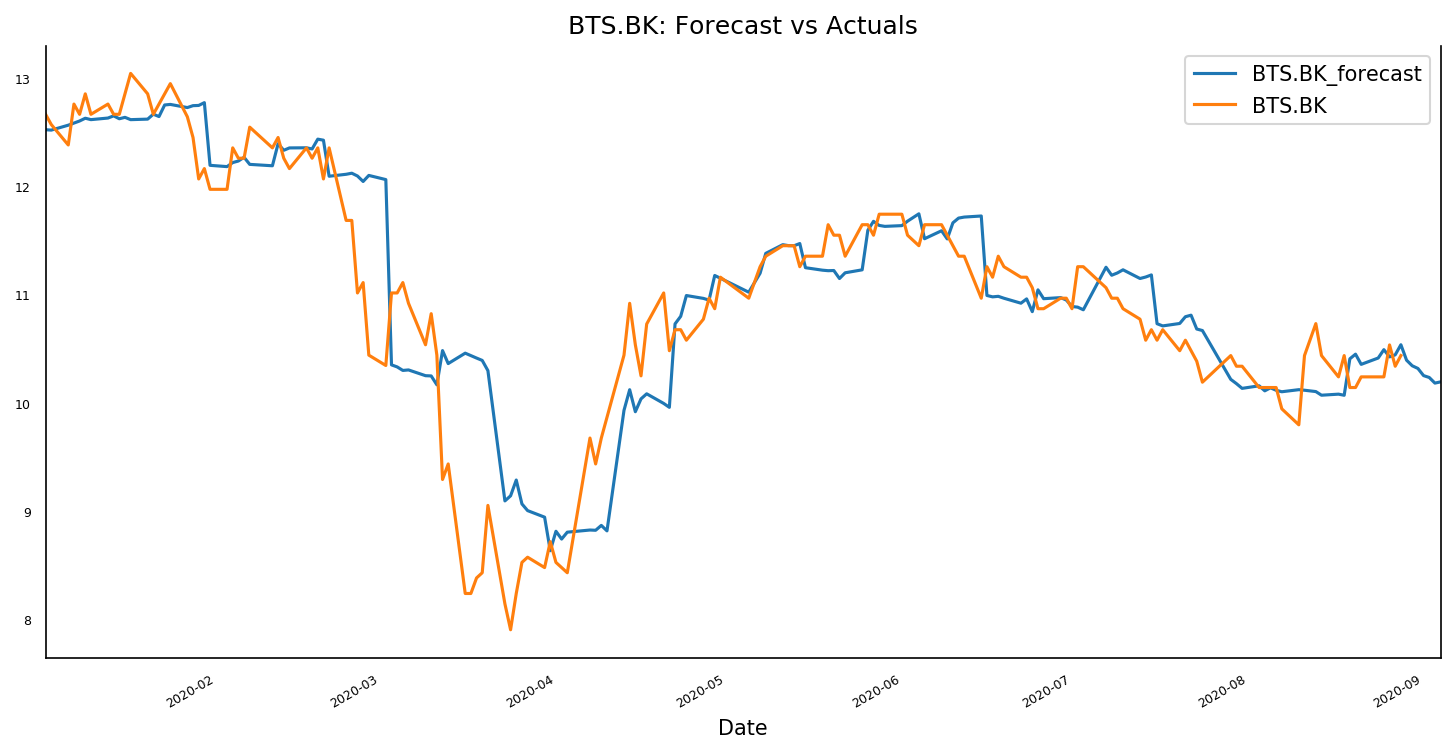

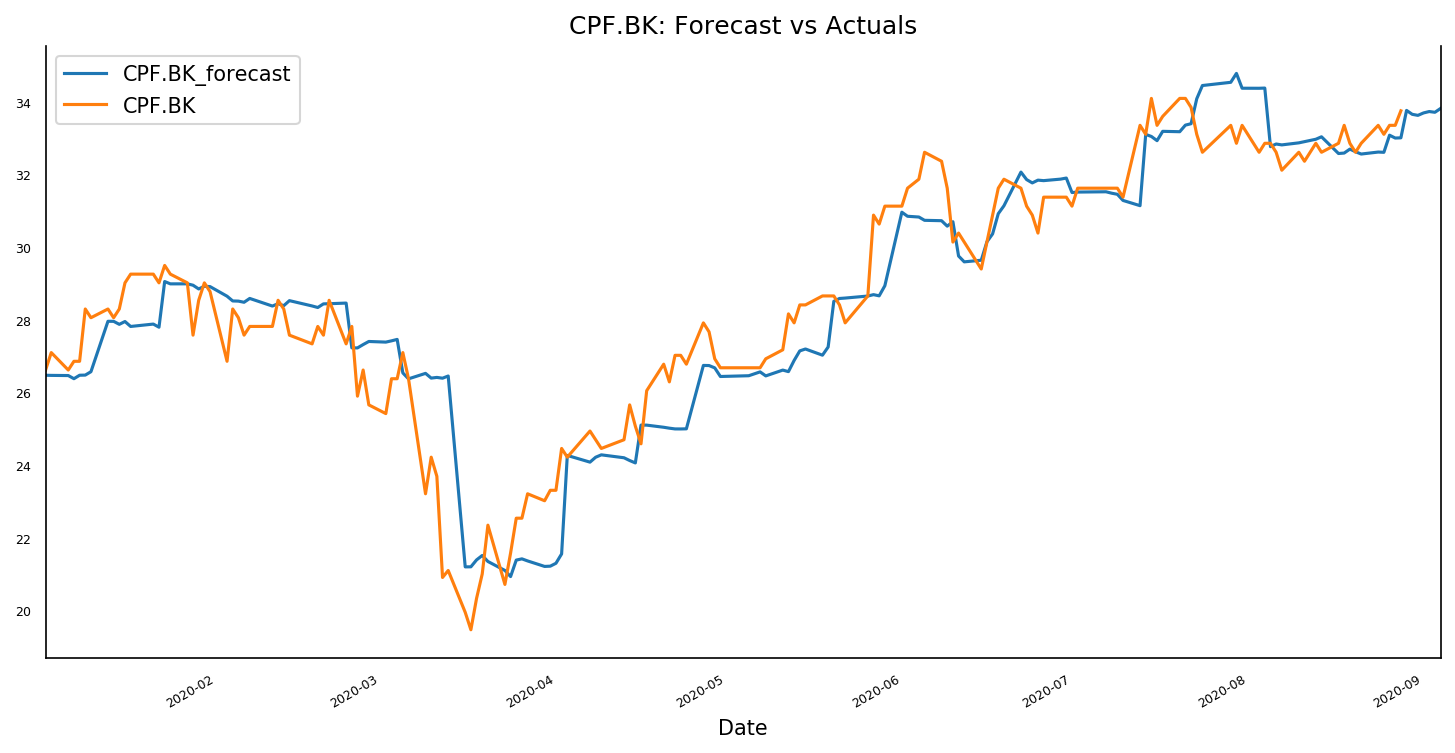

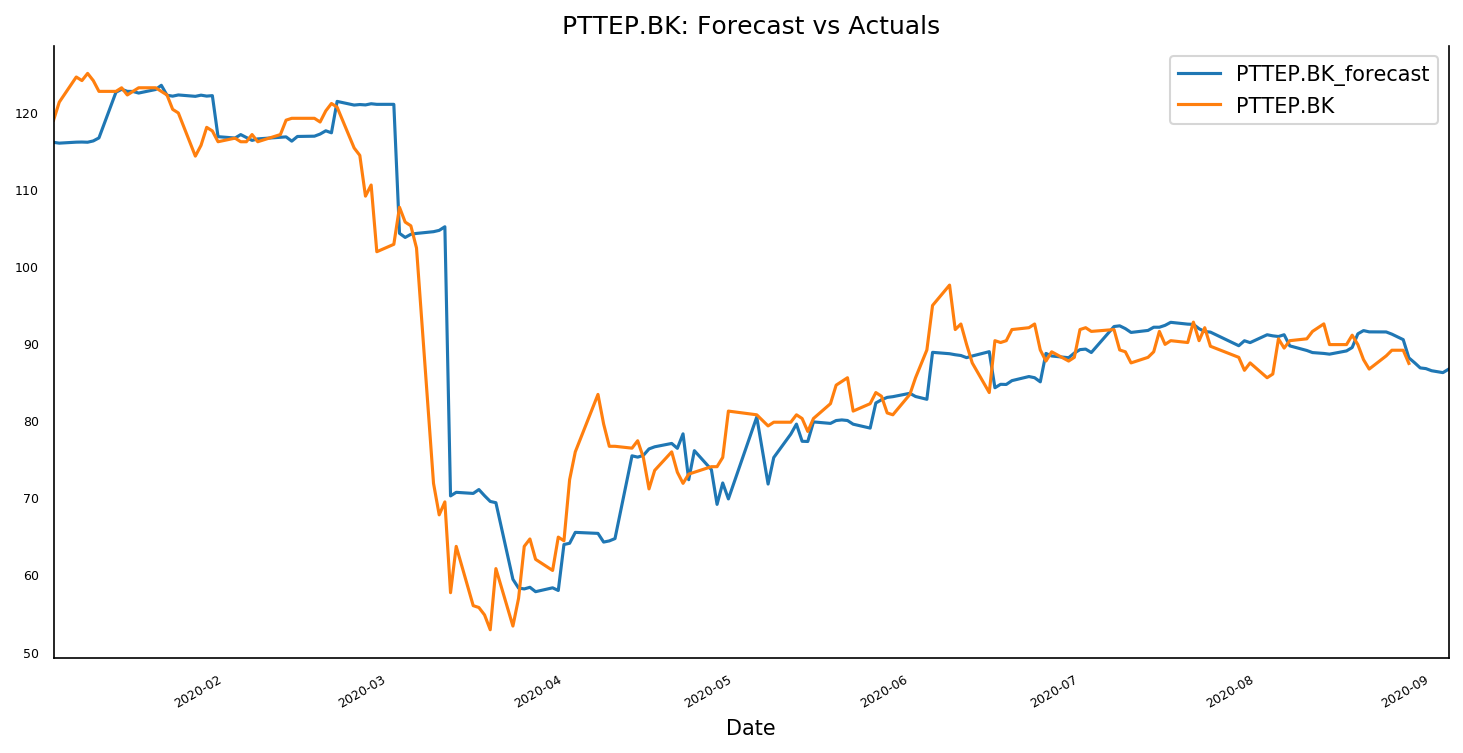

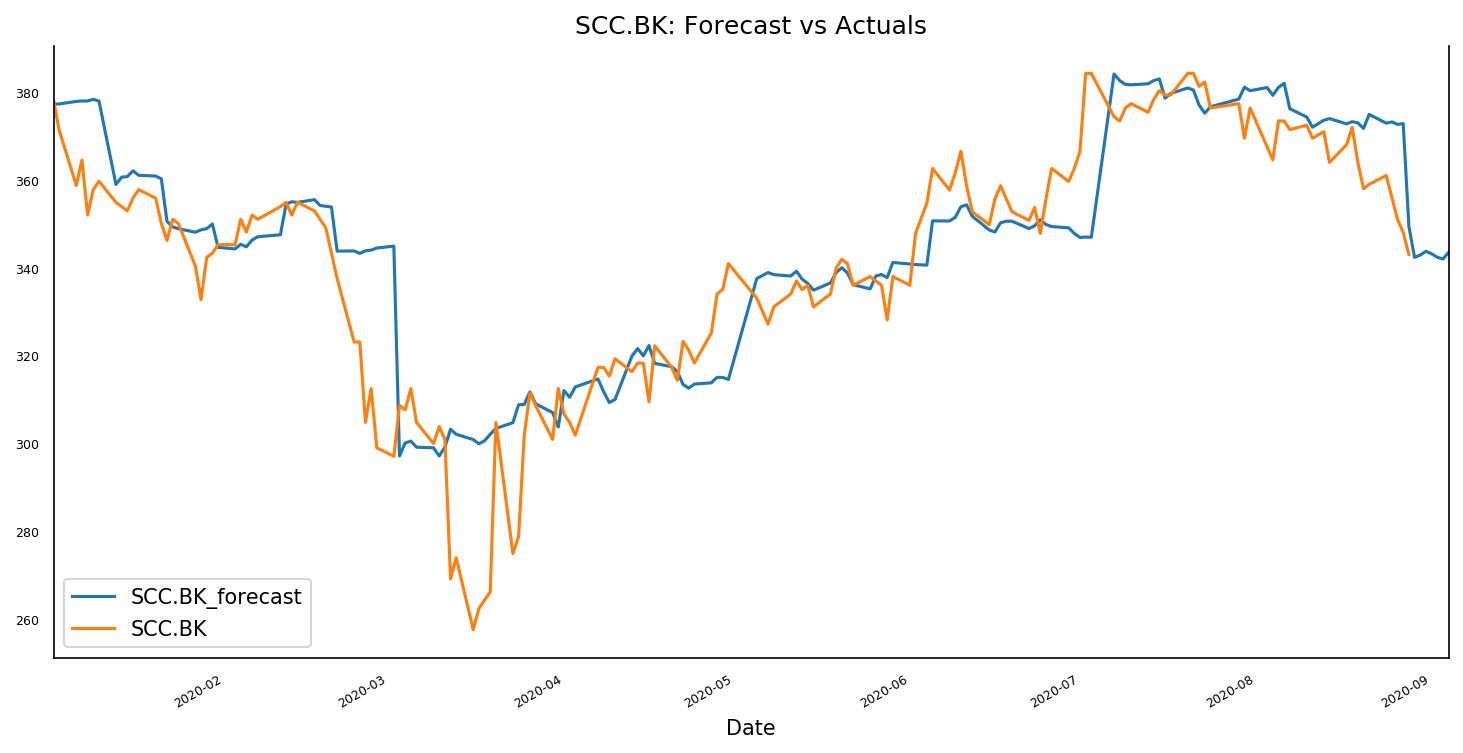

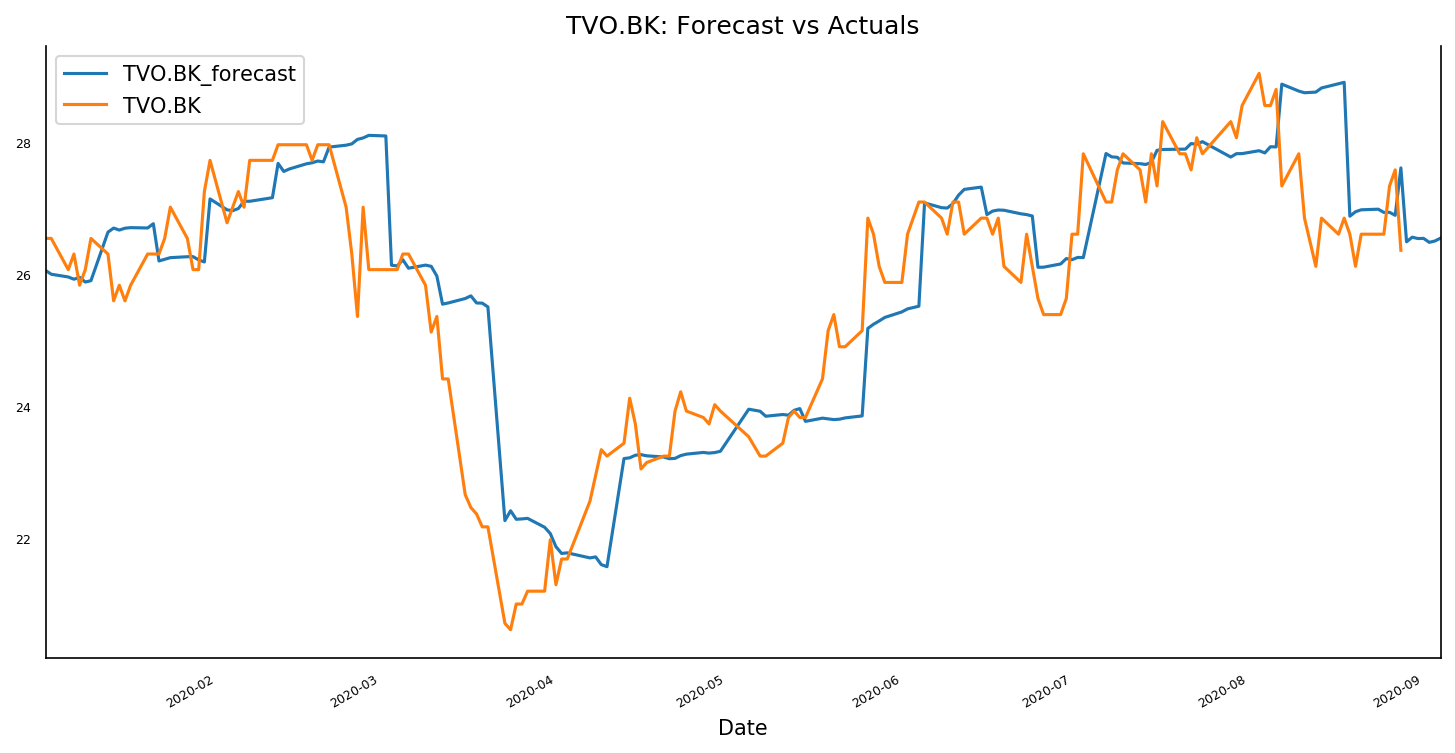

In [587]:
import plotly.express as px
for i in list_of_stock :
    fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(12,6))
#     BTS_prediction_n['BTS.BK'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
    locals()[str(i)+'_prediction_n'][i+'.BK'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
#     BTS_testslicing['BTS.BK'].plot(legend=True );
    locals()[str(i)+'_testslicing'][i+'.BK'].plot(legend=True )
    axes.set_title(i+'.BK' + ": Forecast vs Actuals")
    axes.xaxis.set_ticks_position('none')
    axes.yaxis.set_ticks_position('none')
    axes.spines["top"].set_alpha(0)
    axes.tick_params(labelsize=6)



In [588]:
# predict=BTS_prediction_n
# test=BTS_testslicing
# i='BTS'
# # for i in list_of_stock:

# fig = go.Figure()

# fig.add_trace(

#     go.Scatter(x=locals()[str(i)+'_prediction_n'].index, 
#                y=locals()[str(i)+'_prediction_n'][i+'.BK'+'_forecast'],
#                name = '{}.BK_forecast'.format(i)
#               )

# )

# fig.add_trace(

#     go.Scatter(x=locals()[str(i)+'_testslicing'].index, 
#                y=locals()[str(i)+'_testslicing'][i+'.BK'],
#                name = '{}.BK'.format(i)
#               )
# ) 

# fig.update_xaxes(title_text="Date")
# fig.update_yaxes(title_text="Price")
# fig.update_layout(height=800, width=1100, title_text="Side By Side Subplots")
# fig.show()

In [589]:
def plot_Price(pred,tests,name_stock):
# name_stock = 'BTS'
# pred = BTS_prediction_n
# tests = BTS_testslicing

    fig = go.Figure()

    fig.add_trace(

    #     go.Scatter(x=locals()[str(name_stock)+'_prediction_n'].index, 
    #                y=locals()[str(name_stock)+'_prediction_n'][i+'.BK'+'_forecast'],
    #                name = '{}.BK_forecast'.format(name_stock)
    #               )
                go.Scatter(x=pred.index, 
                       y=pred[name_stock+'.BK'+'_forecast'],
                       name = '{}.BK_forecast'.format(name_stock)
                      )

    )

    fig.add_trace(

    #         go.Scatter(x=locals()[str(name_stock)+'_testslicing'].index, 
    #                    y=locals()[str(name_stock)+'_testslicing'][i+'.BK'],
    #                    name = '{}.BK'.format(name_stock)
    #                   )
                go.Scatter(x=tests.index, 
                           y=tests[name_stock+'.BK'],
                           name = '{}.BK'.format(name_stock)
                          )
    ) 
    colors = {
    'background': '#111111',
    'text': '#7FDBFF'
    }
    fig.update_xaxes(title_text="Date")
    fig.update_yaxes(title_text="Price(THB)")
    fig.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)
#     fig.update_layout(height=700, width=1000, title_text="Stock Price Prediction",)
    fig.update_layout( title_text="{} Stock Price Prediction".format(name_stock),title_font_size=30,height=600)
# fig.show()
    return fig

In [590]:
BTS_plot = plot_Price(BTS_prediction_n,BTS_testslicing,'BTS')
CPF_plot = plot_Price(CPF_prediction_n,CPF_testslicing,'CPF')
PTTEP_plot = plot_Price(PTTEP_prediction_n,PTTEP_testslicing,'PTTEP')
SCC_plot = plot_Price(SCC_prediction_n,SCC_testslicing,'SCC')
TVO_plot = plot_Price(TVO_prediction_n,TVO_testslicing,'TVO')

In [591]:
# forecast_results_n.loc[:, ["BTS.BK_forecast" ]]

In [592]:
# fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(8,4))
# forecast_results_n['BTS.BK'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
# axes.set_title('BTS.BK' + ": Forecast vs Actuals")
# axes.xaxis.set_ticks_position('none')
# axes.yaxis.set_ticks_position('none')
# axes.spines["top"].set_alpha(0)
# axes.tick_params(labelsize=6)

# evaluate forecast

In [593]:
for i in list_of_stock:
    print('Forecast Accuracy of: {}\n'.format(i))
#     accuracy_prod = forecast_accuracy(BTS_prediction['BTS.BK_forecast'].values, BTS_testslicing['BTS.BK'])
    locals()[str(i)+'_accuracy_prod'] = forecast_accuracy(locals()[str(i)+'_prediction'][i+'.BK_forecast'].values, locals()[str(i)+'_testslicing'][i+'.BK'])
    for k, v in locals()[str(i)+'_accuracy_prod'].items():
        print(k, ': ', round(v,4))
    print('\n')
    plt.tight_layout();


Forecast Accuracy of: BTS

mae (Mean Absolute Error) :  0.366
rmse (Root Mean Square Error) :  0.5575
mape (Mean absolute percentage error) :  3.6356


Forecast Accuracy of: CPF

mae (Mean Absolute Error) :  0.9198
rmse (Root Mean Square Error) :  1.2506
mape (Mean absolute percentage error) :  3.4182


Forecast Accuracy of: PTTEP

mae (Mean Absolute Error) :  4.6281
rmse (Root Mean Square Error) :  7.43
mape (Mean absolute percentage error) :  5.7514


Forecast Accuracy of: SCC

mae (Mean Absolute Error) :  9.5873
rmse (Root Mean Square Error) :  13.996
mape (Mean absolute percentage error) :  2.9495


Forecast Accuracy of: TVO

mae (Mean Absolute Error) :  0.7485
rmse (Root Mean Square Error) :  1.0369
mape (Mean absolute percentage error) :  2.9946




<Figure size 432x288 with 0 Axes>

# CNN-LSTM

In [25]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM, GRU, SimpleRNN, Conv1D, TimeDistributed, MaxPooling1D, Flatten, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [26]:
training_BTS_CNN_LSTM =  BTS.iloc[:, -1:].values
training_CPF_CNN_LSTM =  CPF.iloc[:, -1:].values
training_PTTEP_CNN_LSTM =  PTTEP.iloc[:, -1:].values
training_SCC_CNN_LSTM =  SCC.iloc[:, -1:].values
training_TVO_CNN_LSTM =  TVO.iloc[:, -1:].values

sc = MinMaxScaler(feature_range = (0, 1))

# training_BTS_scaled =  sc.fit_transform(training_BTS_CNN_LSTM)
# training_CPF_scaled =  sc.fit_transform(training_CPF_CNN_LSTM)
# training_PTTEP_scaled =  sc.fit_transform(training_PTTEP_CNN_LSTM)
# training_SCC_scaled =  sc.fit_transform(training_SCC_CNN_LSTM)
# training_TVO_scaled =  sc.fit_transform(training_TVO_CNN_LSTM)



In [27]:
# def split_x_y(stock,training_set_scaled,n_out_day) :
#     x_train = []
#     y_train = []

#     n_in_day = len(stock.loc['2010-01-01':'2018-12-31'])
#     n_out_day = n_out_day

# #     maxx = len(stock.loc['2010-01-01':'2018-12-31'])
#     for i in range(n_in_day, len(training_set_scaled) ):
#             y_train.append(training_set_scaled[i, 0])           
#     if n_out_day <= 1:    
#         for i in range(n_in_day, len(training_set_scaled) ):
#             x_train.append(training_set_scaled[i-n_in_day:i, 0])
#     else:
#         for i in range(n_in_day, len(training_set_scaled),n_out_day ):
#             x_train.append(training_set_scaled[i-n_in_day:i, 0])
#         x_train = x_train[:-1]
#         x_train.append(training_set_scaled[len(training_set_scaled)-7-n_in_day:len(training_set_scaled)-7, 0])

        

#     x_train, y_train = np.array(x_train), np.array(y_train)
# #     x_train = np.array(x_train)
#     x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
#     if n_out_day > 1: 
#         remain = len(y_train)%n_out_day
# #         print('hel')
# #         print(n_out_day)
# #         print(len(y_train))
# #         print(remain)
# #         print(x_train.shape[0])
#         if remain != 0:
#             y_train = y_train[:-remain]
#             x_train = x_train[:-1]
# #             print(x_train.shape[0])
# #             print(x_train[0])
# #             print('--------------------------')
#         else:
# #             print(len(y_train))
#             y_train = y_train[:]
#             x_train = x_train[:]
# #         print(len(y_train))
#         y_train = np.reshape(y_train,(x_train.shape[0],n_out_day))
    
    
#     return x_train,y_train,n_in_day



In [28]:
def split_x_y(stock,training_set_scaled,n_out_day) :
    x_train = []
    y_train = []
    x_train_pred = []
    n_in_day = len(stock.loc['2010-01-01':'2018-12-31'])
    n_out_day = n_out_day


  
    for i in range( len(training_set_scaled)-1,n_in_day-1, -1):
            y_train.insert(0,training_set_scaled[i, 0])                 
    if n_out_day <= 1:    
        for i in range( len(training_set_scaled) -1,n_in_day-1,-1 ):    
            x_train.insert(0,training_set_scaled[i-n_in_day:i, 0])  
    else:
        for i in range(len(training_set_scaled)-1,n_in_day-1,-n_out_day ):
            x_train.insert(0,training_set_scaled[i-n_in_day:i, 0])
    


    x_train_pred = x_train.copy()
    x_train_pred.append(training_set_scaled[-n_in_day:, 0])        

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_train_pred = np.array(x_train_pred)
    x_train_pred = np.reshape(x_train_pred, (x_train_pred.shape[0], x_train_pred.shape[1], 1))
    
    if n_out_day > 1: 
        remain = len(y_train)%n_out_day
        if remain != 0:
            y_train = y_train[remain:]
            x_train = x_train[1:]
            x_train_pred = x_train_pred[1:]
        else:
            y_train = y_train[:]
            x_train = x_train[:]
            x_train_pred = x_train_pred[:]
        y_train = np.reshape(y_train,(x_train.shape[0],n_out_day))
    
    
    return x_train_pred,x_train,y_train,n_in_day



In [29]:
# BTSx_train1,BTSy_train1,BTSsteps1 = split_x_y(BTS,training_BTS_scaled,1)
# BTSx_train2,BTSy_train2,BTSsteps2 = split_x_y(BTS,training_BTS_scaled,2)
# BTSx_train3,BTSy_train3,BTSsteps3 = split_x_y(BTS,training_BTS_scaled,3)
# BTSx_train4,BTSy_train4,BTSsteps4 = split_x_y(BTS,training_BTS_scaled,4)
# BTSx_train5,BTSy_train5,BTSsteps5 = split_x_y(BTS,training_BTS_scaled,5)
# BTSx_train6,BTSy_train6,BTSsteps6 = split_x_y(BTS,training_BTS_scaled,6)
# BTSx_train7,BTSy_train7,BTSsteps7 = split_x_y(BTS,training_BTS_scaled,7)

In [30]:
# BTSx_train,BTSy_train,BTSsteps = split_x_y(BTS,training_BTS_scaled)
# PTTEPx_train,PTTEPy_train,PTTEPsteps = split_x_y(PTTEP,training_PTTEP_scaled)
# SCCx_train,SCCy_train,SCCsteps = split_x_y(SCC,training_SCC_scaled)
# TVOx_train,TVOy_train,TVOsteps = split_x_y(TVO,training_TVO_scaled)
# CPFx_train,CPFy_train,CPFsteps = split_x_y(CPF,training_CPF_scaled)


In [31]:
def cnnlstm_predict(x_train,n_in_day,n_out_day):
    ypre=[]
#     ytest=[]
    for i in range(len(x_train)):
        x_input = x_train[i]
        x_input = x_input.reshape((1, n_in_day, 1))
        yhat = model.predict(x_input, verbose=0)
#         break
#         print(yhat)
        if(n_out_day <=1 ):
            ypre.append(float(yhat))
        else:
            for j in range(0,n_out_day):                
                try:
                    ypre.append(float(yhat[0][j]))
                except:
                    break
    return ypre


In [32]:
#inverse_transform
def inverse_pred(y_train,ypre,n_out_day):
#     sc = MinMaxScaler(feature_range = (0, 1))
    list_ytrain=[]
    list_ypre=[]
    
#     for i,j in zip(y_train,ypre) :
#         list_ytrain.append([i])
#         list_ypre.append([j])


#     list_ytrain = np.array(list_ytrain)
#     list_ypre = np.array(list_ypre)

    if n_out_day <=1:
#         for i,j in zip(y_train,ypre) :
        for i in y_train:
            list_ytrain.append([i])
        for j in ypre:
            list_ypre.append([j])
    else :
        for i in y_train :           
            for k in i:
                list_ytrain.append([k])
        for j in ypre:
                list_ypre.append([j])
#     print(list_ytrain)
    test_set_real = sc.inverse_transform(list_ytrain)
    pre_set_real = sc.inverse_transform(list_ypre)

    test_set_real =test_set_real.tolist()
    pre_set_real =pre_set_real.tolist()
        
#     else:
#         test_set_real=[]
#         pre_set_real=[]
#         print(list_ytrain[0])
#         for k in range(len(y_train)):
#             test_in= sc.inverse_transform(list_ytrain[k])
#             pre_in = sc.inverse_transform(list_ypre[k])          
#             test_in =test_set_real.tolist()
#             pre_in =pre_set_real.tolist()
#             test_set_real.append(test_in)
#             pre_set_real.append(test_set_real)
    
            

    return test_set_real,pre_set_real

# bts_test_real,bts_pre_real=inverse_pred(BTSy_train,bts_pred)

# cpf_test_real,cpf_pre_real=inverse_pred(CPFy_train,cpf_pred)
# pttep_test_real,pttep_pre_real=inverse_pred(PTTEPy_train,pttep_pred)
# scc_test_real,scc_pre_real=inverse_pred(SCCy_train,scc_pred)
# tvo_test_real,tvo_pre_real=inverse_pred(TVOy_train,tvo_pred)


In [33]:
# bts_pred = cnnlstm_predict(BTSx_train2,BTSsteps2,n_out_day2)
# bts_test_real,bts_pre_real=inverse_pred(BTSy_train2,bts_pred,n_out_day2)

In [34]:
# # BTSy_train7
# bts_test_real,bts_pre_real=inverse_pred(BTSy_train7,bts_pred,n_out_day7)
# # BTSy_train7

In [35]:
#create list
def create_list(test_set_real,pre_set_real,n_out_day):
    test = []
    predict = []
#     if n_out_day <=1:
#     print(test_set_real)
    for i in range(len(test_set_real)):
        test.append(test_set_real[i][0])
    for i in range(len(pre_set_real)):
        predict.append(pre_set_real[i][0])
#     for i in range(len(x_train)):
#         for j in (test_set_real[i]):
#             test.append(j)
#     for i in  range(len(pre_set_real)):
#         predict.append(pre_set_real[i])
        
#     else:
#         for i in range(0,len(x_train),7):
#             plist=[]
#             tlist=[]
#             for j in range(0,7):
#                 plist.append(test_set_real[i+j][0])
#                 tlist.append(pre_set_real[i+j][0])
                
#         test.append(plist)
#         predict.append(tlist)
        
    return test,predict

In [36]:
epochs = 400
n_out_day1 = 1
n_out_day7 = 7
predict1d = 1
predict7d = 7

In [37]:
training_BTS_scaled =  sc.fit_transform(training_BTS_CNN_LSTM)
# training_BTS_scaled =  training_BTS_CNN_LSTM

BTSx_trainPred1,BTSx_train1,BTSy_train1,BTSsteps1 = split_x_y(BTS,training_BTS_scaled,1)
BTSx_trainPred7,BTSx_train7,BTSy_train7,BTSsteps7 = split_x_y(BTS,training_BTS_scaled,7)

In [40]:
# fit model
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(BTSsteps7, 1)))
model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
model.add(LSTM(64,return_sequences=True)),
model.add(LSTM(32)),
# model.add(Flatten())
model.add(Dense(16, activation='relu'))
# model.add(Dense(10))
model.add(Dense(predict7d))
model.compile(optimizer='adam', loss='mse',metrics=['mae','mape','acc'])

model.summary()

bts_hist = model.fit(BTSx_train7,BTSy_train7, batch_size=32,epochs=epochs,verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 2197, 64)          192       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1098, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1098, 64)          33024     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 119       
Total params: 46,279
Trainable params: 46,279
Non-trainable params: 0
__________________________________________________

2/2 [==============================] - 1s 666ms/step - loss: 0.0028 - mae: 0.0391 - mape: 5.1508 - acc: 0.1764
Epoch 123/400
2/2 [==============================] - 1s 569ms/step - loss: 0.0033 - mae: 0.0428 - mape: 5.6624 - acc: 0.1879
Epoch 124/400
2/2 [==============================] - 1s 681ms/step - loss: 0.0029 - mae: 0.0398 - mape: 5.2323 - acc: 0.1566
Epoch 125/400
2/2 [==============================] - 1s 643ms/step - loss: 0.0038 - mae: 0.0488 - mape: 6.1284 - acc: 0.0564
Epoch 126/400
2/2 [==============================] - 1s 667ms/step - loss: 0.0039 - mae: 0.0465 - mape: 6.2903 - acc: 0.1868
Epoch 127/400
2/2 [==============================] - 1s 697ms/step - loss: 0.0030 - mae: 0.0421 - mape: 5.2997 - acc: 0.0898
Epoch 128/400
2/2 [==============================] - 1s 543ms/step - loss: 0.0033 - mae: 0.0406 - mape: 5.4825 - acc: 0.1117
Epoch 129/400
2/2 [==============================] - 1s 673ms/step - loss: 0.0028 - mae: 0.0389 - mape: 5.0015 - acc: 0.1774
Epoch 130/400


2/2 [==============================] - 1s 650ms/step - loss: 7.9578e-04 - mae: 0.0209 - mape: 2.6571 - acc: 0.1900
Epoch 252/400
2/2 [==============================] - 1s 671ms/step - loss: 8.0341e-04 - mae: 0.0211 - mape: 2.6726 - acc: 0.1774
Epoch 253/400
2/2 [==============================] - 1s 682ms/step - loss: 8.3482e-04 - mae: 0.0218 - mape: 2.8508 - acc: 0.1659
Epoch 254/400
2/2 [==============================] - 1s 680ms/step - loss: 8.6536e-04 - mae: 0.0225 - mape: 2.8006 - acc: 0.1994
Epoch 255/400
2/2 [==============================] - 1s 678ms/step - loss: 8.1430e-04 - mae: 0.0212 - mape: 2.7424 - acc: 0.1774
Epoch 256/400
2/2 [==============================] - 1s 680ms/step - loss: 6.6368e-04 - mae: 0.0194 - mape: 2.4597 - acc: 0.1347
Epoch 257/400
2/2 [==============================] - 1s 680ms/step - loss: 7.6194e-04 - mae: 0.0205 - mape: 2.6207 - acc: 0.1451
Epoch 258/400
2/2 [==============================] - 1s 673ms/step - loss: 8.1815e-04 - mae: 0.0214 - mape: 2.6

2/2 [==============================] - 1s 693ms/step - loss: 6.5119e-04 - mae: 0.0195 - mape: 2.4719 - acc: 0.2557
Epoch 378/400
2/2 [==============================] - 1s 728ms/step - loss: 6.2089e-04 - mae: 0.0188 - mape: 2.3445 - acc: 0.2234
Epoch 379/400
2/2 [==============================] - 1s 671ms/step - loss: 5.8403e-04 - mae: 0.0182 - mape: 2.2668 - acc: 0.1911
Epoch 380/400
2/2 [==============================] - 1s 685ms/step - loss: 5.9920e-04 - mae: 0.0184 - mape: 2.3130 - acc: 0.1785
Epoch 381/400
2/2 [==============================] - 1s 670ms/step - loss: 5.2947e-04 - mae: 0.0177 - mape: 2.2788 - acc: 0.1774
Epoch 382/400
2/2 [==============================] - 1s 681ms/step - loss: 6.5187e-04 - mae: 0.0199 - mape: 2.4616 - acc: 0.1566
Epoch 383/400
2/2 [==============================] - 1s 684ms/step - loss: 5.6985e-04 - mae: 0.0183 - mape: 2.3181 - acc: 0.3100
Epoch 384/400
2/2 [==============================] - 1s 677ms/step - loss: 5.3890e-04 - mae: 0.0177 - mape: 2.2

In [344]:
# #predict 1d
# bts_pred = cnnlstm_predict(BTSx_train1,BTSsteps1,n_out_day1)
# bts_test_real,bts_pre_real=inverse_pred(BTSy_train1,bts_pred,n_out_day1)
# bts_test_real,bts_pre_real=create_list(bts_test_real,bts_test_real,bts_pre_real,n_out_day1)

In [345]:
#predict 7d

bts_pred = cnnlstm_predict(BTSx_trainPred7,BTSsteps7,n_out_day7)

bts_test_real,bts_pre_real=inverse_pred(BTSy_train7,bts_pred,n_out_day7)

bts_test_real,bts_pre_real=create_list(bts_test_real,bts_pre_real,n_out_day7)
# bts_test_real,bts_pre_real=create_list(BTSy_train7,BTSy_train7,bts_pred,n_out_day7)

In [346]:

training_CPF_scaled =  sc.fit_transform(training_CPF_CNN_LSTM)


CPFx_trainPred1,CPFx_train1,CPFy_train1,CPFsteps1 = split_x_y(CPF,training_CPF_scaled,1)
CPFx_trainPred7,CPFx_train7,CPFy_train7,CPFsteps7 = split_x_y(CPF,training_CPF_scaled,7)

In [347]:
# fit model
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(CPFsteps7, 1)))
model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
model.add(LSTM(64,return_sequences=True)),
model.add(LSTM(32)),
model.add(Flatten())
model.add(Dense(16, activation='relu'))
# model.add(Dense(10))
model.add(Dense(predict7d))
model.compile(optimizer='adam', loss='mse',metrics=['mae','mape','acc'])

model.summary()

cpf_hist = model.fit(CPFx_train7,CPFy_train7, batch_size=32,epochs=epochs,verbose=1)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 2107, 64)          192       
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 1053, 64)          0         
_________________________________________________________________
lstm_36 (LSTM)               (None, 1053, 64)          33024     
_________________________________________________________________
lstm_37 (LSTM)               (None, 32)                12416     
_________________________________________________________________
flatten_18 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_37 (Dense)             (None, 7)               

2/2 [==============================] - 2s 1s/step - loss: 0.0021 - mae: 0.0349 - mape: 5.0035 - acc: 0.1178
Epoch 125/400
2/2 [==============================] - 2s 1s/step - loss: 0.0022 - mae: 0.0355 - mape: 5.1263 - acc: 0.1716
Epoch 126/400
2/2 [==============================] - 2s 1s/step - loss: 0.0023 - mae: 0.0356 - mape: 4.7784 - acc: 0.1716
Epoch 127/400
2/2 [==============================] - 2s 1s/step - loss: 0.0022 - mae: 0.0377 - mape: 5.4249 - acc: 0.1386
Epoch 128/400
2/2 [==============================] - 2s 1s/step - loss: 0.0022 - mae: 0.0337 - mape: 4.8467 - acc: 0.1265
Epoch 129/400
2/2 [==============================] - 2s 1s/step - loss: 0.0020 - mae: 0.0318 - mape: 4.4623 - acc: 0.1282
Epoch 130/400
2/2 [==============================] - 2s 1s/step - loss: 0.0024 - mae: 0.0379 - mape: 5.5691 - acc: 0.1265
Epoch 131/400
2/2 [==============================] - 2s 1s/step - loss: 0.0020 - mae: 0.0324 - mape: 4.6527 - acc: 0.1265
Epoch 132/400
2/2 [===================

2/2 [==============================] - 2s 1s/step - loss: 0.0014 - mae: 0.0273 - mape: 3.8673 - acc: 0.1248
Epoch 192/400
2/2 [==============================] - 2s 1s/step - loss: 0.0014 - mae: 0.0286 - mape: 4.0506 - acc: 0.1144
Epoch 193/400
2/2 [==============================] - 2s 1s/step - loss: 0.0015 - mae: 0.0280 - mape: 4.0370 - acc: 0.1265
Epoch 194/400
2/2 [==============================] - 2s 1s/step - loss: 0.0014 - mae: 0.0264 - mape: 3.7863 - acc: 0.1265
Epoch 195/400
2/2 [==============================] - 2s 1s/step - loss: 0.0015 - mae: 0.0299 - mape: 4.2507 - acc: 0.1941
Epoch 196/400
2/2 [==============================] - 2s 1s/step - loss: 0.0016 - mae: 0.0280 - mape: 4.0007 - acc: 0.1369
Epoch 197/400
2/2 [==============================] - 2s 1s/step - loss: 0.0016 - mae: 0.0293 - mape: 4.0765 - acc: 0.1057
Epoch 198/400
2/2 [==============================] - 2s 1s/step - loss: 0.0019 - mae: 0.0336 - mape: 4.8292 - acc: 0.1837
Epoch 199/400
2/2 [===================

2/2 [==============================] - 2s 1s/step - loss: 0.0010 - mae: 0.0238 - mape: 3.3667 - acc: 0.1144 
Epoch 259/400
2/2 [==============================] - 2s 1s/step - loss: 0.0011 - mae: 0.0244 - mape: 3.3937 - acc: 0.0814
Epoch 260/400
2/2 [==============================] - 2s 1s/step - loss: 0.0011 - mae: 0.0252 - mape: 3.5951 - acc: 0.1837
Epoch 261/400
2/2 [==============================] - 2s 1s/step - loss: 0.0012 - mae: 0.0256 - mape: 3.6676 - acc: 0.1699
Epoch 262/400
2/2 [==============================] - 2s 1s/step - loss: 0.0010 - mae: 0.0238 - mape: 3.3241 - acc: 0.1144 
Epoch 263/400
2/2 [==============================] - 2s 1s/step - loss: 0.0012 - mae: 0.0259 - mape: 3.8108 - acc: 0.2305
Epoch 264/400
2/2 [==============================] - 2s 1s/step - loss: 9.8322e-04 - mae: 0.0232 - mape: 3.2464 - acc: 0.1144
Epoch 265/400
2/2 [==============================] - 2s 992ms/step - loss: 0.0013 - mae: 0.0258 - mape: 3.6394 - acc: 0.0919
Epoch 266/400
2/2 [==========

2/2 [==============================] - 2s 1s/step - loss: 6.6462e-04 - mae: 0.0183 - mape: 2.5721 - acc: 0.1386
Epoch 390/400
2/2 [==============================] - 2s 1s/step - loss: 7.4621e-04 - mae: 0.0191 - mape: 2.7703 - acc: 0.1958
Epoch 391/400
2/2 [==============================] - 3s 1s/step - loss: 6.9544e-04 - mae: 0.0190 - mape: 2.6848 - acc: 0.1716
Epoch 392/400
2/2 [==============================] - 2s 1s/step - loss: 7.5672e-04 - mae: 0.0193 - mape: 2.7983 - acc: 0.2392
Epoch 393/400
2/2 [==============================] - 2s 1s/step - loss: 7.7710e-04 - mae: 0.0198 - mape: 2.8502 - acc: 0.2184
Epoch 394/400
2/2 [==============================] - 2s 1s/step - loss: 7.5886e-04 - mae: 0.0194 - mape: 2.7919 - acc: 0.1265
Epoch 395/400
2/2 [==============================] - 2s 1s/step - loss: 6.6281e-04 - mae: 0.0183 - mape: 2.6184 - acc: 0.2167
Epoch 396/400
2/2 [==============================] - 2s 1s/step - loss: 6.9419e-04 - mae: 0.0182 - mape: 2.6370 - acc: 0.1508
Epoch 

In [348]:
# #predict1
# cpf_pred=cnnlstm_predict(CPFx_trainPred1,CPFsteps1,n_out_day1)
# cpf_test_real,cpf_pre_real=inverse_pred(CPFy_train1,cpf_pred,n_out_day1)

# cpf_test_real,cpf_pre_real=create_list(cpf_test_real,cpf_pre_real,n_out_day1)

In [349]:
#predict7
cpf_pred=cnnlstm_predict(CPFx_trainPred7,CPFsteps7,n_out_day7)
cpf_test_real,cpf_pre_real=inverse_pred(CPFy_train7,cpf_pred,n_out_day7)

cpf_test_real,cpf_pre_real=create_list(cpf_test_real,cpf_pre_real,n_out_day7)


In [350]:

training_PTTEP_scaled =  sc.fit_transform(training_PTTEP_CNN_LSTM)

PTTEPx_trainPred1,PTTEPx_train1,PTTEPy_train1,PTTEPsteps1 = split_x_y(PTTEP,training_PTTEP_scaled,1)
PTTEPx_trainPred7,PTTEPx_train7,PTTEPy_train7,PTTEPsteps7 = split_x_y(PTTEP,training_PTTEP_scaled,7)

In [351]:
# fit model
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(PTTEPsteps7, 1)))
model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
model.add(LSTM(64,return_sequences=True)),
model.add(LSTM(32)),
model.add(Flatten())
model.add(Dense(16, activation='relu'))
# model.add(Dense(10))
model.add(Dense(predict7d))
model.compile(optimizer='adam', loss='mse',metrics=['mae','mape','acc'])

model.summary()

pttep_hist = model.fit(PTTEPx_train7,PTTEPy_train7, batch_size=32,epochs=epochs,verbose=1)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_19 (Conv1D)           (None, 2197, 64)          192       
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 1098, 64)          0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 1098, 64)          33024     
_________________________________________________________________
lstm_39 (LSTM)               (None, 32)                12416     
_________________________________________________________________
flatten_19 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_39 (Dense)             (None, 7)               

2/2 [==============================] - 3s 1s/step - loss: 0.0029 - mae: 0.0315 - mape: 6.4079 - acc: 0.1430
Epoch 125/400
2/2 [==============================] - 3s 1s/step - loss: 0.0030 - mae: 0.0327 - mape: 6.8597 - acc: 0.1325
Epoch 126/400
2/2 [==============================] - 3s 1s/step - loss: 0.0024 - mae: 0.0300 - mape: 6.3946 - acc: 0.0460
Epoch 127/400
2/2 [==============================] - 3s 1s/step - loss: 0.0022 - mae: 0.0296 - mape: 5.6532 - acc: 0.0564
Epoch 128/400
2/2 [==============================] - 3s 1s/step - loss: 0.0028 - mae: 0.0315 - mape: 6.2724 - acc: 0.1221
Epoch 129/400
2/2 [==============================] - 3s 1s/step - loss: 0.0030 - mae: 0.0325 - mape: 6.9344 - acc: 0.1325
Epoch 130/400
2/2 [==============================] - 3s 1s/step - loss: 0.0027 - mae: 0.0303 - mape: 6.0980 - acc: 0.1106
Epoch 131/400
2/2 [==============================] - 3s 1s/step - loss: 0.0024 - mae: 0.0308 - mape: 6.1752 - acc: 0.1315
Epoch 132/400
2/2 [===================

2/2 [==============================] - 3s 1s/step - loss: 0.0014 - mae: 0.0222 - mape: 4.2482 - acc: 0.2536
Epoch 258/400
2/2 [==============================] - 2s 1s/step - loss: 9.3003e-04 - mae: 0.0200 - mape: 3.5560 - acc: 0.1659
Epoch 259/400
2/2 [==============================] - 3s 1s/step - loss: 8.9030e-04 - mae: 0.0182 - mape: 3.3487 - acc: 0.2223
Epoch 260/400
2/2 [==============================] - 2s 1s/step - loss: 9.3507e-04 - mae: 0.0209 - mape: 3.6401 - acc: 0.1106
Epoch 261/400
2/2 [==============================] - 2s 1s/step - loss: 0.0012 - mae: 0.0213 - mape: 4.1075 - acc: 0.1336
Epoch 262/400
2/2 [==============================] - 2s 1s/step - loss: 0.0011 - mae: 0.0195 - mape: 3.7763 - acc: 0.2328
Epoch 263/400
2/2 [==============================] - 2s 1s/step - loss: 9.1896e-04 - mae: 0.0193 - mape: 3.5718 - acc: 0.2536
Epoch 264/400
2/2 [==============================] - 3s 1s/step - loss: 8.3888e-04 - mae: 0.0182 - mape: 3.3230 - acc: 0.1659
Epoch 265/400
2/2 

2/2 [==============================] - 3s 1s/step - loss: 7.0413e-04 - mae: 0.0183 - mape: 3.3604 - acc: 0.3006
Epoch 388/400
2/2 [==============================] - 2s 1s/step - loss: 6.6409e-04 - mae: 0.0172 - mape: 3.2026 - acc: 0.2547
Epoch 389/400
2/2 [==============================] - 3s 1s/step - loss: 6.2321e-04 - mae: 0.0169 - mape: 3.2483 - acc: 0.1774
Epoch 390/400
2/2 [==============================] - 3s 1s/step - loss: 8.6725e-04 - mae: 0.0197 - mape: 3.7707 - acc: 0.1670
Epoch 391/400
2/2 [==============================] - 3s 1s/step - loss: 6.5815e-04 - mae: 0.0165 - mape: 3.1304 - acc: 0.2892
Epoch 392/400
2/2 [==============================] - 3s 1s/step - loss: 6.7490e-04 - mae: 0.0178 - mape: 3.2512 - acc: 0.3204
Epoch 393/400
2/2 [==============================] - 3s 1s/step - loss: 8.6496e-04 - mae: 0.0196 - mape: 3.7755 - acc: 0.2098
Epoch 394/400
2/2 [==============================] - 3s 1s/step - loss: 6.3194e-04 - mae: 0.0169 - mape: 3.0856 - acc: 0.2787
Epoch 

In [352]:
# #predict1
# pttep_pred=cnnlstm_predict(PTTEPx_trainPred1,PTTEPsteps1,n_out_day1)

# pttep_test_real,pttep_pre_real=inverse_pred(PTTEPy_train1,pttep_pred,n_out_day1)

# pttep_test_real,pttep_pre_real=create_list(pttep_test_real,pttep_pre_real,n_out_day1)


In [353]:
#predict7

pttep_pred=cnnlstm_predict(PTTEPx_trainPred7,PTTEPsteps7,n_out_day7)

pttep_test_real,pttep_pre_real=inverse_pred(PTTEPy_train7,pttep_pred,n_out_day7)

pttep_test_real,pttep_pre_real=create_list(pttep_test_real,pttep_pre_real,n_out_day7)


In [354]:

training_SCC_scaled =  sc.fit_transform(training_SCC_CNN_LSTM)

SCCx_trainPred1,SCCx_train1,SCCy_train1,SCCsteps1 = split_x_y(SCC,training_SCC_scaled,1)
SCCx_trainPred7,SCCx_train7,SCCy_train7,SCCsteps7 = split_x_y(SCC,training_SCC_scaled,7)

In [355]:
# fit model
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(SCCsteps7, 1)))
model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
model.add(LSTM(64,return_sequences=True)),
model.add(LSTM(32)),
model.add(Flatten())
model.add(Dense(16, activation='relu'))
# model.add(Dense(10))
model.add(Dense(predict7d))
model.compile(optimizer='adam', loss='mse',metrics=['mae','mape','acc'])

model.summary()

scc_hist = model.fit(SCCx_train7,SCCy_train7, batch_size=32,epochs=epochs,verbose=1)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 2197, 64)          192       
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 1098, 64)          0         
_________________________________________________________________
lstm_40 (LSTM)               (None, 1098, 64)          33024     
_________________________________________________________________
lstm_41 (LSTM)               (None, 32)                12416     
_________________________________________________________________
flatten_20 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_41 (Dense)             (None, 7)               

2/2 [==============================] - 3s 1s/step - loss: 0.0014 - mae: 0.0293 - mape: 4.7097 - acc: 0.1221
Epoch 125/400
2/2 [==============================] - 3s 1s/step - loss: 0.0017 - mae: 0.0335 - mape: 5.1123 - acc: 0.1117
Epoch 126/400
2/2 [==============================] - 3s 1s/step - loss: 0.0015 - mae: 0.0300 - mape: 4.6928 - acc: 0.1106
Epoch 127/400
2/2 [==============================] - 3s 1s/step - loss: 0.0015 - mae: 0.0302 - mape: 4.8185 - acc: 0.0887
Epoch 128/400
2/2 [==============================] - 3s 1s/step - loss: 0.0015 - mae: 0.0315 - mape: 4.8524 - acc: 0.1002
Epoch 129/400
2/2 [==============================] - 3s 1s/step - loss: 0.0014 - mae: 0.0295 - mape: 4.5895 - acc: 0.0887
Epoch 130/400
2/2 [==============================] - 2s 1s/step - loss: 0.0015 - mae: 0.0313 - mape: 4.8246 - acc: 0.1440
Epoch 131/400
2/2 [==============================] - 3s 1s/step - loss: 0.0016 - mae: 0.0308 - mape: 4.9245 - acc: 0.1106
Epoch 132/400
2/2 [===================

2/2 [==============================] - 3s 1s/step - loss: 0.0011 - mae: 0.0267 - mape: 4.2078 - acc: 0.1221
Epoch 259/400
2/2 [==============================] - 3s 1s/step - loss: 0.0011 - mae: 0.0267 - mape: 4.2629 - acc: 0.1555
Epoch 260/400
2/2 [==============================] - 3s 1s/step - loss: 0.0011 - mae: 0.0260 - mape: 4.0614 - acc: 0.1336
Epoch 261/400
2/2 [==============================] - 3s 1s/step - loss: 0.0013 - mae: 0.0280 - mape: 4.3435 - acc: 0.1013
Epoch 262/400
2/2 [==============================] - 3s 1s/step - loss: 0.0015 - mae: 0.0310 - mape: 4.8181 - acc: 0.1232
Epoch 263/400
2/2 [==============================] - 3s 1s/step - loss: 0.0011 - mae: 0.0264 - mape: 4.0079 - acc: 0.1659
Epoch 264/400
2/2 [==============================] - 3s 1s/step - loss: 0.0017 - mae: 0.0326 - mape: 5.0248 - acc: 0.1221
Epoch 265/400
2/2 [==============================] - 3s 1s/step - loss: 0.0016 - mae: 0.0331 - mape: 4.9526 - acc: 0.2098
Epoch 266/400
2/2 [===================

2/2 [==============================] - 3s 1s/step - loss: 8.7310e-04 - mae: 0.0237 - mape: 3.6513 - acc: 0.1566
Epoch 390/400
2/2 [==============================] - 3s 1s/step - loss: 9.0566e-04 - mae: 0.0236 - mape: 3.6428 - acc: 0.1972
Epoch 391/400
2/2 [==============================] - 3s 1s/step - loss: 9.1426e-04 - mae: 0.0239 - mape: 3.6089 - acc: 0.1347
Epoch 392/400
2/2 [==============================] - 3s 1s/step - loss: 8.8103e-04 - mae: 0.0236 - mape: 3.6161 - acc: 0.1879
Epoch 393/400
2/2 [==============================] - 3s 1s/step - loss: 8.4178e-04 - mae: 0.0230 - mape: 3.5230 - acc: 0.2130
Epoch 394/400
2/2 [==============================] - 3s 1s/step - loss: 9.6942e-04 - mae: 0.0247 - mape: 3.6319 - acc: 0.2098
Epoch 395/400
2/2 [==============================] - 3s 1s/step - loss: 9.1026e-04 - mae: 0.0232 - mape: 3.5733 - acc: 0.1659
Epoch 396/400
2/2 [==============================] - 3s 1s/step - loss: 8.5364e-04 - mae: 0.0231 - mape: 3.5945 - acc: 0.2087
Epoch 

In [356]:
# #predict1
# scc_pred=cnnlstm_predict(SCCx_trainPred1,SCCsteps1,n_out_day1)

# scc_test_real,scc_pre_real=inverse_pred(SCCy_train1,scc_pred,n_out_day1)

# scc_test_real,scc_pre_real=create_list(scc_test_real,scc_pre_real,n_out_day1)


In [357]:
#predict7
scc_pred=cnnlstm_predict(SCCx_trainPred7,SCCsteps7,n_out_day7)

scc_test_real,scc_pre_real=inverse_pred(SCCy_train7,scc_pred,n_out_day7)

scc_test_real,scc_pre_real=create_list(scc_test_real,scc_pre_real,n_out_day7)


In [358]:

training_TVO_scaled =  sc.fit_transform(training_TVO_CNN_LSTM)

TVOx_trainPred1,TVOx_train1,TVOy_train1,TVOsteps1 = split_x_y(TVO,training_TVO_scaled,1)
TVOx_trainPred7,TVOx_train7,TVOy_train7,TVOsteps7 = split_x_y(TVO,training_TVO_scaled,7)

In [359]:
# fit model
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(TVOsteps7, 1)))
model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
model.add(LSTM(64,return_sequences=True)),
model.add(LSTM(32)),
model.add(Flatten())
model.add(Dense(16, activation='relu'))
# model.add(Dense(10))
model.add(Dense(predict7d))
model.compile(optimizer='adam', loss='mse',metrics=['mae','mape','acc'])

model.summary()

tvo_hist = model.fit(TVOx_train7,TVOy_train7, batch_size=32,epochs=epochs,verbose=1)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           (None, 2197, 64)          192       
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 1098, 64)          0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 1098, 64)          33024     
_________________________________________________________________
lstm_43 (LSTM)               (None, 32)                12416     
_________________________________________________________________
flatten_21 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_43 (Dense)             (None, 7)               

2/2 [==============================] - 2s 1s/step - loss: 0.0029 - mae: 0.0413 - mape: 6.1381 - acc: 0.0898
Epoch 59/400
2/2 [==============================] - 3s 1s/step - loss: 0.0030 - mae: 0.0423 - mape: 6.3117 - acc: 0.0887
Epoch 60/400
2/2 [==============================] - 3s 1s/step - loss: 0.0030 - mae: 0.0424 - mape: 6.4310 - acc: 0.1336
Epoch 61/400
2/2 [==============================] - 3s 1s/step - loss: 0.0028 - mae: 0.0415 - mape: 6.1897 - acc: 0.1796
Epoch 62/400
2/2 [==============================] - 3s 1s/step - loss: 0.0028 - mae: 0.0413 - mape: 6.1439 - acc: 0.0898
Epoch 63/400
2/2 [==============================] - 3s 1s/step - loss: 0.0029 - mae: 0.0421 - mape: 6.2561 - acc: 0.1764
Epoch 64/400
2/2 [==============================] - 3s 1s/step - loss: 0.0031 - mae: 0.0431 - mape: 6.3933 - acc: 0.1879
Epoch 65/400
2/2 [==============================] - 3s 1s/step - loss: 0.0027 - mae: 0.0405 - mape: 6.0642 - acc: 0.1451
Epoch 66/400
2/2 [===========================

2/2 [==============================] - 3s 1s/step - loss: 0.0012 - mae: 0.0267 - mape: 3.9233 - acc: 0.1774
Epoch 193/400
2/2 [==============================] - 3s 1s/step - loss: 9.7772e-04 - mae: 0.0235 - mape: 3.4932 - acc: 0.1451
Epoch 194/400
2/2 [==============================] - 3s 1s/step - loss: 9.5911e-04 - mae: 0.0242 - mape: 3.5970 - acc: 0.2787
Epoch 195/400
2/2 [==============================] - 3s 1s/step - loss: 0.0010 - mae: 0.0248 - mape: 3.6272 - acc: 0.1983
Epoch 196/400
2/2 [==============================] - 3s 1s/step - loss: 9.8449e-04 - mae: 0.0240 - mape: 3.5833 - acc: 0.0898
Epoch 197/400
2/2 [==============================] - 3s 1s/step - loss: 9.3273e-04 - mae: 0.0237 - mape: 3.5373 - acc: 0.0887
Epoch 198/400
2/2 [==============================] - 3s 1s/step - loss: 9.2710e-04 - mae: 0.0240 - mape: 3.6065 - acc: 0.1451
Epoch 199/400
2/2 [==============================] - 3s 1s/step - loss: 9.3929e-04 - mae: 0.0238 - mape: 3.6253 - acc: 0.1879
Epoch 200/400


2/2 [==============================] - 3s 1s/step - loss: 5.1302e-04 - mae: 0.0182 - mape: 2.6886 - acc: 0.0898
Epoch 323/400
2/2 [==============================] - 3s 1s/step - loss: 5.6726e-04 - mae: 0.0192 - mape: 2.8366 - acc: 0.1994
Epoch 324/400
2/2 [==============================] - 3s 1s/step - loss: 5.5300e-04 - mae: 0.0189 - mape: 2.8002 - acc: 0.2421
Epoch 325/400
2/2 [==============================] - 3s 1s/step - loss: 5.4780e-04 - mae: 0.0187 - mape: 2.7444 - acc: 0.1889
Epoch 326/400
2/2 [==============================] - 3s 1s/step - loss: 5.3139e-04 - mae: 0.0184 - mape: 2.7432 - acc: 0.1440
Epoch 327/400
2/2 [==============================] - 3s 2s/step - loss: 5.5106e-04 - mae: 0.0190 - mape: 2.8076 - acc: 0.1232
Epoch 328/400
2/2 [==============================] - 3s 1s/step - loss: 5.3140e-04 - mae: 0.0187 - mape: 2.7710 - acc: 0.1879
Epoch 329/400
2/2 [==============================] - 3s 1s/step - loss: 5.1865e-04 - mae: 0.0183 - mape: 2.7233 - acc: 0.1325
Epoch 

In [1]:
3 * 400 / 60

20.0

In [360]:
# #predict1
# tvo_pred=cnnlstm_predict(TVOx_trainPred1,TVOsteps1,n_out_day1)

# tvo_test_real,tvo_pre_real=inverse_pred(TVOy_train1,tvo_pred,n_out_day1)

# tvo_test_real,tvo_pre_real=create_list(tvo_test_real,tvo_pre_real,n_out_day1)

In [361]:
#predict7
tvo_pred=cnnlstm_predict(TVOx_trainPred7,TVOsteps7,n_out_day7)

tvo_test_real,tvo_pre_real=inverse_pred(TVOy_train7,tvo_pred,n_out_day7)

tvo_test_real,tvo_pre_real=create_list(tvo_test_real,tvo_pre_real,n_out_day7)

In [362]:
# #predict
# def cnnlstm_predict(x_train):
#     ypre=[]
#     for i in range(len(x_train)):
#         x_input = x_train[i]
#         x_input = x_input.reshape((1, n_steps, n_features))
#         yhat = model.predict(x_input, verbose=0)
#         ypre.append(float(yhat))
#     return ypre

# bts_pred = cnnlstm_predict(BTSx_train)
# cpf_pred=cnnlstm_predict(CPFx_train)
# pttep_pred=cnnlstm_predict(PTTEPx_train)
# scc_pred=cnnlstm_predict(SCCx_train)
# tvo_pred=cnnlstm_predict(TVOx_train)



    
    


In [363]:
# #inverse_transform
# def inverse_pred(y_train,ypre):
# #     sc = MinMaxScaler(feature_range = (0, 1))
#     list_ytrain=[]
#     list_ypre=[]

#     for i,j in zip(y_train,ypre) :
#         list_ytrain.append([i])
#         list_ypre.append([j])
#         print(i)
#         print('\n')
# #         print(j)
#         break

#     list_ytrain = np.array(list_ytrain)
#     list_ypre = np.array(list_ypre)
#     print(list_ytrain)
#     print('\n')
#     test_set_real = sc.inverse_transform(list_ytrain)
#     pre_set_real = sc.inverse_transform(list_ypre)
#     print(test_set_real)
#     print('\n')
#     test_set_real =test_set_real.tolist()
#     pre_set_real =pre_set_real.tolist()

#     return test_set_real,pre_set_real

# bts_test_real,bts_pre_real=inverse_pred(BTSy_train,bts_pred)
# print('aaaaaaaaa')
# cpf_test_real,cpf_pre_real=inverse_pred(CPFy_train,cpf_pred)
# # pttep_test_real,pttep_pre_real=inverse_pred(PTTEPy_train,pttep_pred)
# # scc_test_real,scc_pre_real=inverse_pred(SCCy_train,scc_pred)
# # tvo_test_real,tvo_pre_real=inverse_pred(TVOy_train,tvo_pred)
# bts_test_real
# # BTSy_train

In [364]:
# #create list
# def create_list(x_train,test_set_real,pre_set_real):
#     ptest = []
#     ppre = []
#     for i in range(len(x_train)):
#         ptest.append(test_set_real[i][0])
#         ppre.append(pre_set_real[i][0])
#     return ptest,ppre

# bts_test_real,bts_pre_real=create_list(BTSy_train,bts_test_real,bts_pre_real)
# cpf_test_real,cpf_pre_real=create_list(CPFy_train,cpf_test_real,cpf_pre_real)
# pttep_test_real,pttep_pre_real=create_list(PTTEPy_train,pttep_test_real,pttep_pre_real)
# scc_test_real,scc_pre_real=create_list(SCCy_train,scc_test_real,scc_pre_real)
# tvo_test_real,tvo_pre_real=create_list(TVOy_train,tvo_test_real,tvo_pre_real)
# # bts_test_real

In [365]:
def update_time7d (stock):
    start = 0
    end = len(stock)
    nobs = 1
    month = 8
    day = 28
    New_forecast = pd.DataFrame()
    for i in range(0,7):
        day += 1
        if(day > 31):
            month +=1
            day=1
#         if day < 10 and month < 10 :
#             date = '2020'+'-0'+str(month)+'-0'+str(day)+' 00:00:00'
#         elif day < 10 and month >= 10 :
#             date = '2020'+'-'+str(month)+'-0'+str(day)+' 00:00:00'
#         elif day >= 10  and month < 10:
#             date = '2020'+'-0'+str(month)+'-'+str(day)+' 00:00:00'
#         elif day >= 10  and month >= 10:
#             date = '2020'+'-'+str(month)+'-'+str(day)+' 00:00:00'
#         else :
#             date = '2020'+'-'+str(month)+'-'+str(day)+' 00:00:00'
        if day < 10 and month < 10 :
            date = '2020'+'-0'+str(month)+'-0'+str(day)
        elif day < 10 and month >= 10 :
            date = '2020'+'-'+str(month)+'-0'+str(day)
        elif day >= 10  and month < 10:
            date = '2020'+'-0'+str(month)+'-'+str(day)
        elif day >= 10  and month >= 10:
            date = '2020'+'-'+str(month)+'-'+str(day)
        new_date = pd.DataFrame(index = [date])
        New_forecast = New_forecast.append(new_date)
        Update_day= BTS.append(New_forecast)
        Update_day.index.names = ['Date']
        Update_day = Update_day.reset_index().rename(index=str).sort_values(['Date'])
        Update_day = Update_day.set_index('Date')
    return Update_day
#     return New_forecast
BTS_update = update_time7d(BTS)
CPF_update = update_time7d(CPF)
PTTEP_update = update_time7d(PTTEP)
SCC_update = update_time7d(SCC)
TVO_update = update_time7d(TVO)
BTS_update

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7138: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,AOT.BK,BEM.BK,BTS.BK,CK.BK,EGCO.BK,HG=F,III.BK,JWD.BK,PL=F,SI=F,UNIQ.BK
Date,,,,,,,,,,,
2010-01-04,3.245882,1.677729,1.981645,4.719489,51.251045,3.3880,9.071856,8.132977,1517.300049,17.440001,5.188159
2010-01-05,3.266824,1.677729,1.981645,4.643977,51.568375,3.3960,9.071856,8.132977,1530.800049,17.781000,5.151363
2010-01-06,3.308706,1.677729,1.948617,4.681734,51.092346,3.4775,9.071856,8.132977,1552.199951,18.163000,5.151363
2010-01-07,3.350588,1.698967,1.948617,4.643977,51.092346,3.4115,9.071856,8.132977,1553.000000,18.333000,5.151363
2010-01-08,3.350588,1.677729,1.948617,4.681734,51.092346,3.3880,9.071856,8.132977,1564.599976,18.458000,5.188159
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [366]:
#create dataframe

def create_dataframe(ptest,ppre,stock):
    numday= len(ppre)
#     print(len(ptest))
#     print(len(ppre))
    cnnplot1 = pd.DataFrame((ptest), 
                   columns =['Actuals'],
                    index=stock.iloc[len(stock)-numday:-7].index)
    cnnplot2 = pd.DataFrame((ppre), 
                   columns =['Forcast'],
                    index=stock.iloc[len(stock)-numday:].index)
    cnnplot = cnnplot2.join(cnnplot1)
    return cnnplot
# len(bts_pre_real)

BTSplot_cnn_lstm=create_dataframe(bts_test_real,bts_pre_real,BTS_update)
CPFplot_cnn_lstm=create_dataframe(cpf_test_real,cpf_pre_real,CPF_update)
PTTEPplot_cnn_lstm=create_dataframe(pttep_test_real,pttep_pre_real,PTTEP_update)
SCCplot_cnn_lstm=create_dataframe(scc_test_real,scc_pre_real,SCC_update)
TVOplot_cnn_lstm=create_dataframe(tvo_test_real,tvo_pre_real,TVO_update)

BTSplot_cnn_lstm= BTSplot_cnn_lstm['2020-01-01':]
CPFplot_cnn_lstm= CPFplot_cnn_lstm['2020-01-01':]
PTTEPplot_cnn_lstm= PTTEPplot_cnn_lstm['2020-01-01':]
SCCplot_cnn_lstm= SCCplot_cnn_lstm['2020-01-01':]
TVOplot_cnn_lstm= TVOplot_cnn_lstm['2020-01-01':]

# BTSplot_cnn_lstm
# BTSplot_cnn_lstm.loc['2019-01-11':]

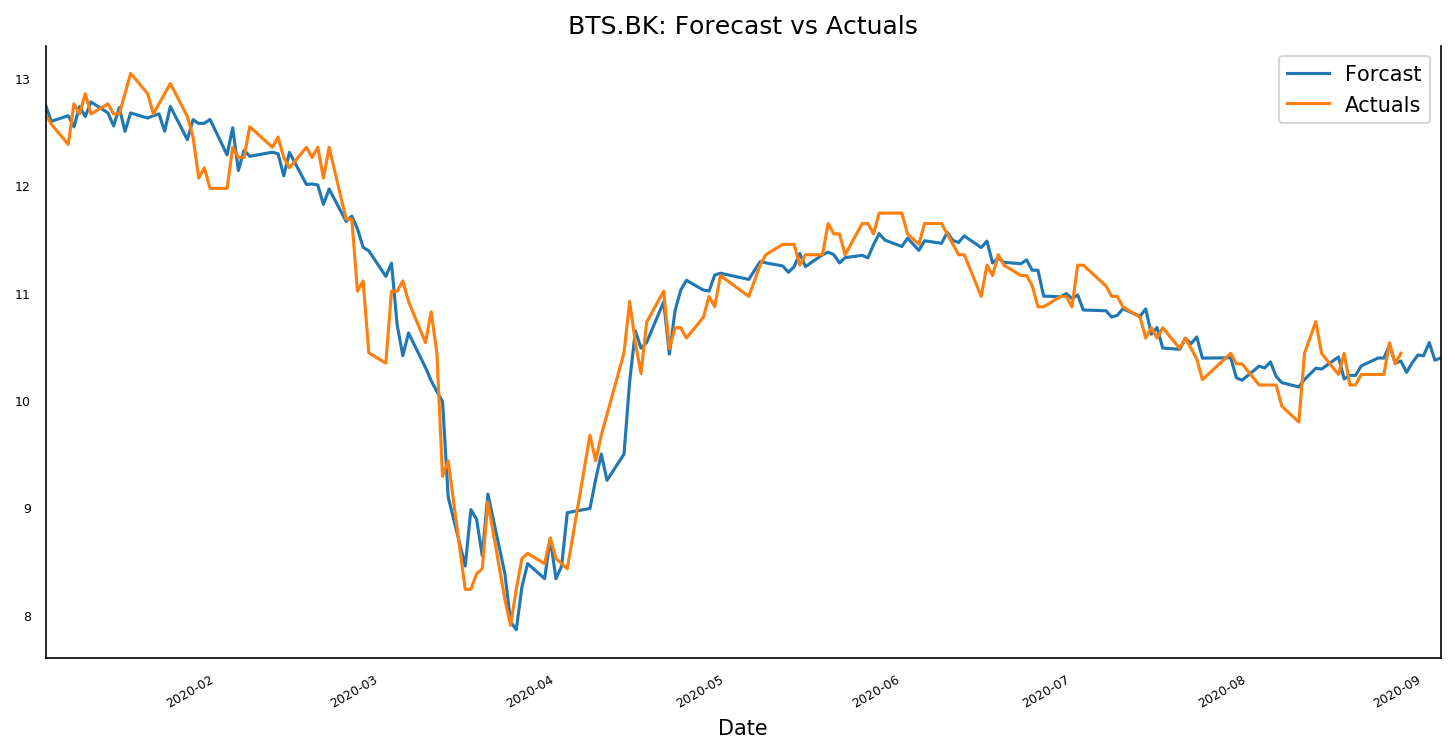

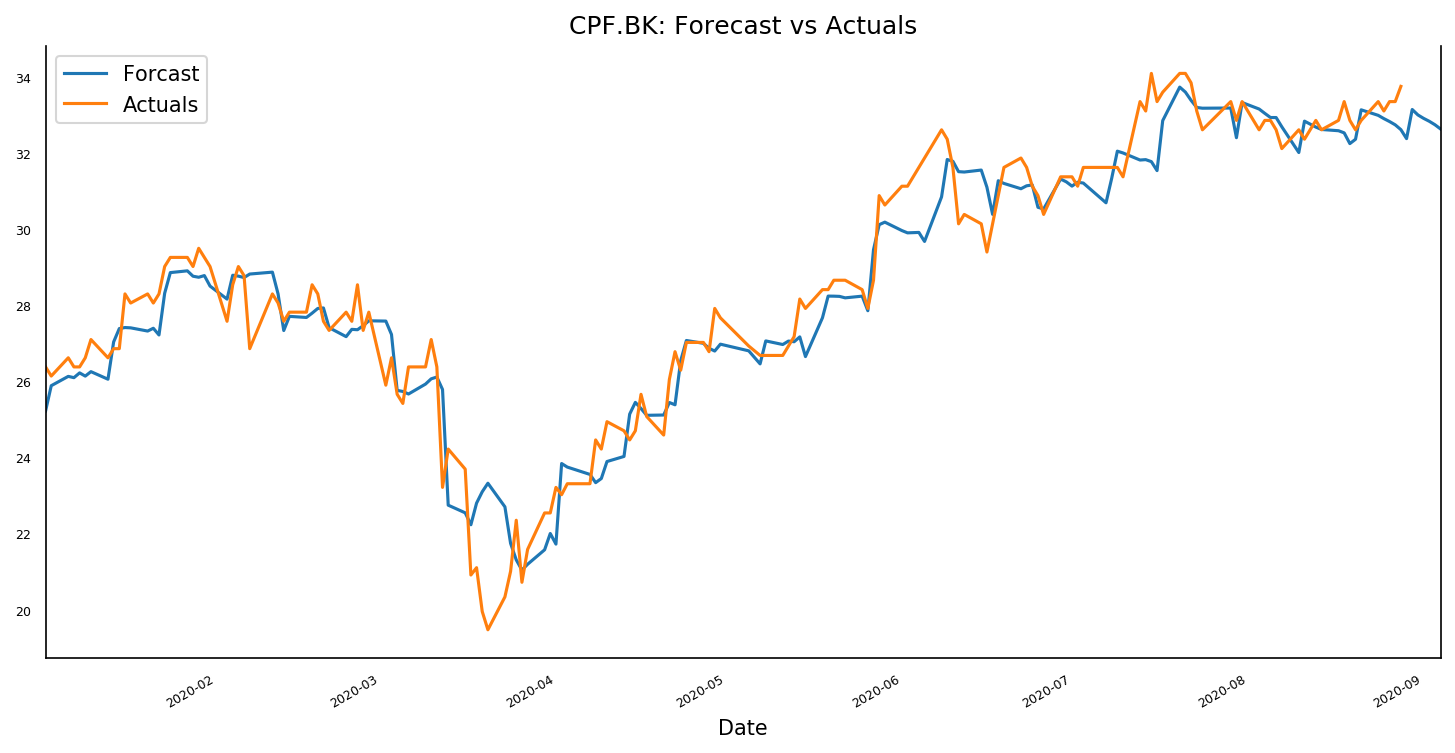

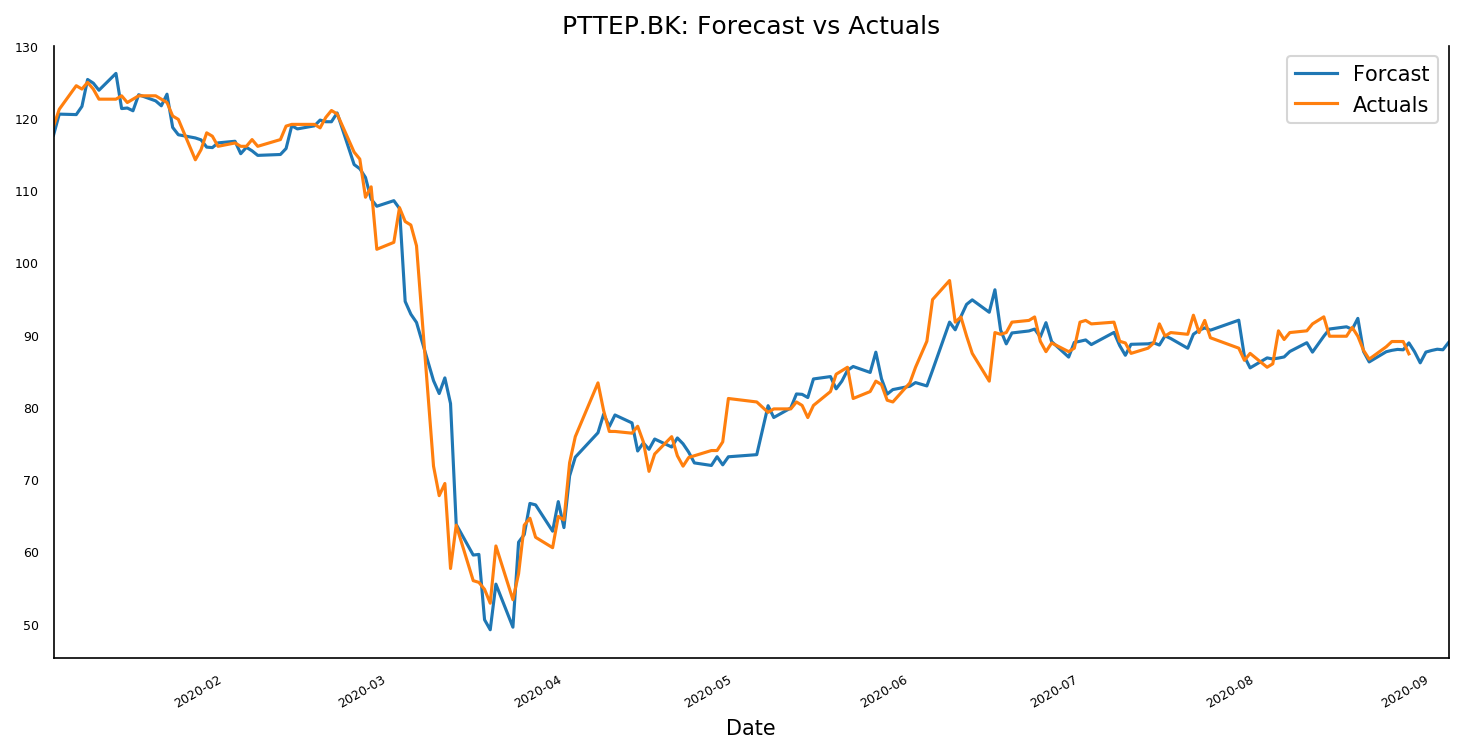

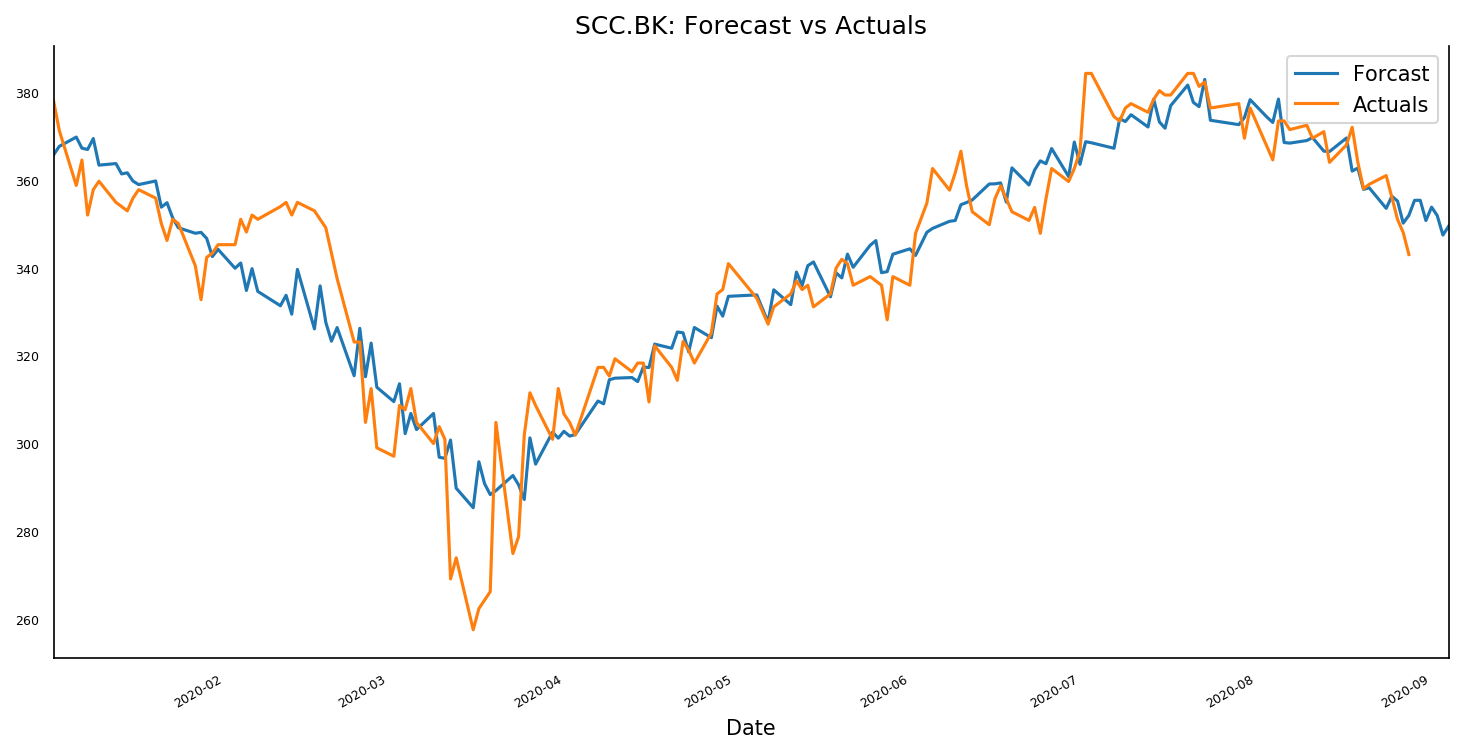

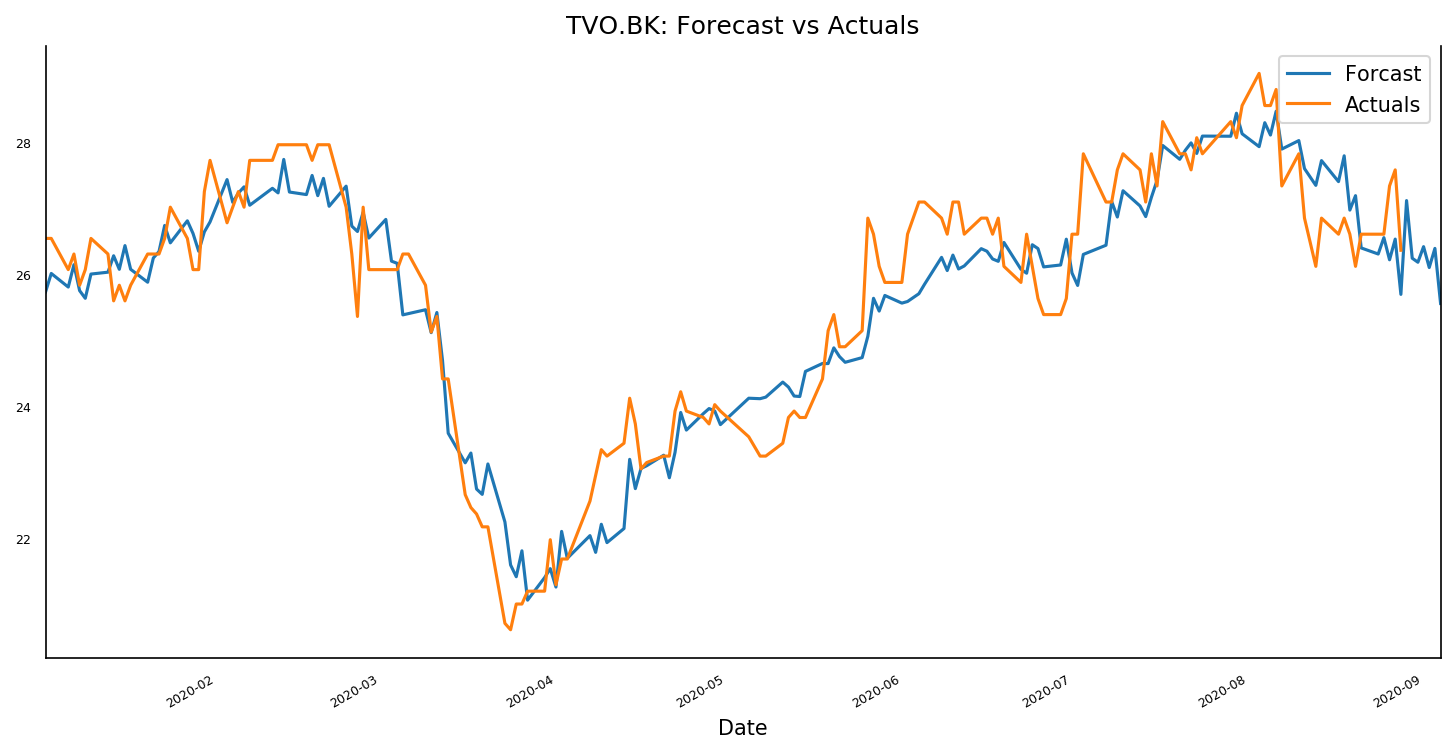

In [367]:
#plot

for i in list_of_stock :
    fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(12,6))
    #     BTS_prediction_n['BTS.BK'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
#         locals()[str(i)+'_prediction_n'][i+'.BK'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
    locals()[str(i)+'plot_cnn_lstm']['Forcast'].plot(legend=True ).autoscale(axis='x',tight=True);
    #     BTS_testslicing['BTS.BK'].plot(legend=True );
#         locals()[str(i)+'_testslicing'][i+'.BK'].plot(legend=True )
    locals()[str(i)+'plot_cnn_lstm']['Actuals'].plot(legend=True );

    axes.set_title(i+'.BK' + ": Forecast vs Actuals")
#     axes.set_title('BTS.BK' + ": Forecast vs Actuals")
    axes.xaxis.set_ticks_position('none')
    axes.yaxis.set_ticks_position('none')
    axes.spines["top"].set_alpha(0)
    axes.tick_params(labelsize=6)

# Evaluate forcast

In [521]:
for i in list_of_stock:
    print('Forecast Accuracy of: {}\n'.format(i))
#     accuracy_prod_CNNLSTM = forecast_accuracy(BTS_prediction['BTS.BK_forecast'].values, BTS_testslicing['BTS.BK'])
    locals()[str(i)+'_accuracy_prod_CNNLSTM'] = forecast_accuracy(locals()[str(i)+'plot_cnn_lstm']['Forcast'].values, locals()[str(i)+'plot_cnn_lstm']['Actuals'])
    for k, v in locals()[str(i)+'_accuracy_prod_CNNLSTM'].items():
        print(k, ': ', round(v,4))
    print('\n')
    plt.tight_layout();

Forecast Accuracy of: BTS

mae (Mean Absolute Error) :  0.2186
rmse (Root Mean Square Error) :  0.2895
mape (Mean absolute percentage error) :  2.0411


Forecast Accuracy of: CPF

mae (Mean Absolute Error) :  0.6646
rmse (Root Mean Square Error) :  0.902
mape (Mean absolute percentage error) :  2.4588


Forecast Accuracy of: PTTEP

mae (Mean Absolute Error) :  2.5938
rmse (Root Mean Square Error) :  4.0603
mape (Mean absolute percentage error) :  3.1658


Forecast Accuracy of: SCC

mae (Mean Absolute Error) :  7.3862
rmse (Root Mean Square Error) :  9.9154
mape (Mean absolute percentage error) :  2.2501


Forecast Accuracy of: TVO

mae (Mean Absolute Error) :  0.5343
rmse (Root Mean Square Error) :  0.648
mape (Mean absolute percentage error) :  2.0897




<Figure size 432x288 with 0 Axes>

# Error percentage price

## download data

In [20]:
BTS_cnn_lstm=pd.read_csv('BTSplot_cnn_lstm400_7d.csv')
CPF_cnn_lstm=pd.read_csv('CPFplot_cnn_lstm400_7d.csv')
PTTEP_cnn_lstm=pd.read_csv('PTTEPplot_cnn_lstm400_7d.csv')
SCC_cnn_lstm=pd.read_csv('SCCplot_cnn_lstm400_7d.csv')
TVO_cnn_lstm=pd.read_csv('TVOplot_cnn_lstm400_7d.csv')

BTS_cnn_lstm.set_index("Date", inplace = True)
CPF_cnn_lstm.set_index("Date", inplace = True)
PTTEP_cnn_lstm.set_index("Date", inplace = True)
SCC_cnn_lstm.set_index("Date", inplace = True)
TVO_cnn_lstm.set_index("Date", inplace = True)

In [21]:
BTS_VAR=pd.read_csv('BTSplot_VAR_13e7d.csv')
CPF_VAR=pd.read_csv('CPFplot_VAR_13e7d.csv')
PTTEP_VAR=pd.read_csv('PTTEPplot_VAR_13e7d.csv')
SCC_VAR=pd.read_csv('SCCplot_VAR_13e7d.csv')
TVO_VAR=pd.read_csv('TVOplot_VAR_13e7d.csv')

BTS_VAR.set_index("Date", inplace = True)
CPF_VAR.set_index("Date", inplace = True)
PTTEP_VAR.set_index("Date", inplace = True)
SCC_VAR.set_index("Date", inplace = True)
TVO_VAR.set_index("Date", inplace = True)

## VAR Model

In [55]:
# rmse = np.mean((forecast - actual)**2)**.5  # RMSE
# mape = np.mean(np.abs(forecast - actual)/np.abs(actual))*100  # MAPE

In [176]:
VAR_BTSerror = pd.DataFrame((np.abs(BTS_VAR['BTS.BK_forecast']-BTS_VAR['BTS.BK'])/np.abs(BTS_VAR['BTS.BK']))*100,columns=['BTS Percent Error (VAR)'])
VAR_CPFerror = pd.DataFrame((np.abs(CPF_VAR['CPF.BK_forecast']-CPF_VAR['CPF.BK'])/np.abs(CPF_VAR['CPF.BK']))*100,columns=['CPF Percent Error (VAR)'])
VAR_PTTEPerror = pd.DataFrame((np.abs(PTTEP_VAR['PTTEP.BK_forecast']-PTTEP_VAR['PTTEP.BK'])/np.abs(PTTEP_VAR['PTTEP.BK']))*100,columns=['PTTEP Percent Error (VAR)'])
VAR_SCCerror = pd.DataFrame((np.abs(SCC_VAR['SCC.BK_forecast']-SCC_VAR['SCC.BK'])/np.abs(SCC_VAR['SCC.BK']))*100,columns=['SCC Percent Error (VAR)'])
VAR_TVOerror = pd.DataFrame((np.abs(TVO_VAR['TVO.BK_forecast']-TVO_VAR['TVO.BK'])/np.abs(TVO_VAR['TVO.BK']))*100,columns=['TVO Percent Error (VAR)'])

VAR_error_percentage_plot=VAR_BTSerror.join(VAR_CPFerror).join(VAR_PTTEPerror).join(VAR_SCCerror).join(VAR_TVOerror)
# VAR_error_percentage_plot

## CNN LSTM Model

In [177]:
CL_BTSerror = pd.DataFrame((np.abs(BTS_cnn_lstm['Forcast']-BTS_cnn_lstm['Actuals'])/np.abs(BTS_cnn_lstm['Actuals']))*100,columns=['BTS Percent Error (CNN-LSTM)'])
CL_CPFerror = pd.DataFrame((np.abs(CPF_cnn_lstm['Forcast']-CPF_cnn_lstm['Actuals'])/np.abs(CPF_cnn_lstm['Actuals']))*100,columns=['CPF Percent Error (CNN-LSTM)'])
CL_PTTEPerror = pd.DataFrame((np.abs(PTTEP_cnn_lstm['Forcast']-PTTEP_cnn_lstm['Actuals'])/np.abs(PTTEP_cnn_lstm['Actuals']))*100,columns=['PTTEP Percent Error (CNN-LSTM)'])
CL_SCCerror = pd.DataFrame((np.abs(SCC_cnn_lstm['Forcast']-SCC_cnn_lstm['Actuals'])/np.abs(SCC_cnn_lstm['Actuals']))*100,columns=['SCC Percent Error (CNN-LSTM)'])
CL_TVOerror = pd.DataFrame((np.abs(TVO_cnn_lstm['Forcast']-TVO_cnn_lstm['Actuals'])/np.abs(TVO_cnn_lstm['Actuals']))*100,columns=['TVO Percent Error (CNN-LSTM)'])

CL_error_percentage_plot=CL_BTSerror.join(CL_CPFerror).join(CL_PTTEPerror).join(CL_SCCerror).join(CL_TVOerror)
# CL_error_percentage_plot

# Plot Error

In [183]:
error_percentage_plot = VAR_error_percentage_plot.join(CL_error_percentage_plot)


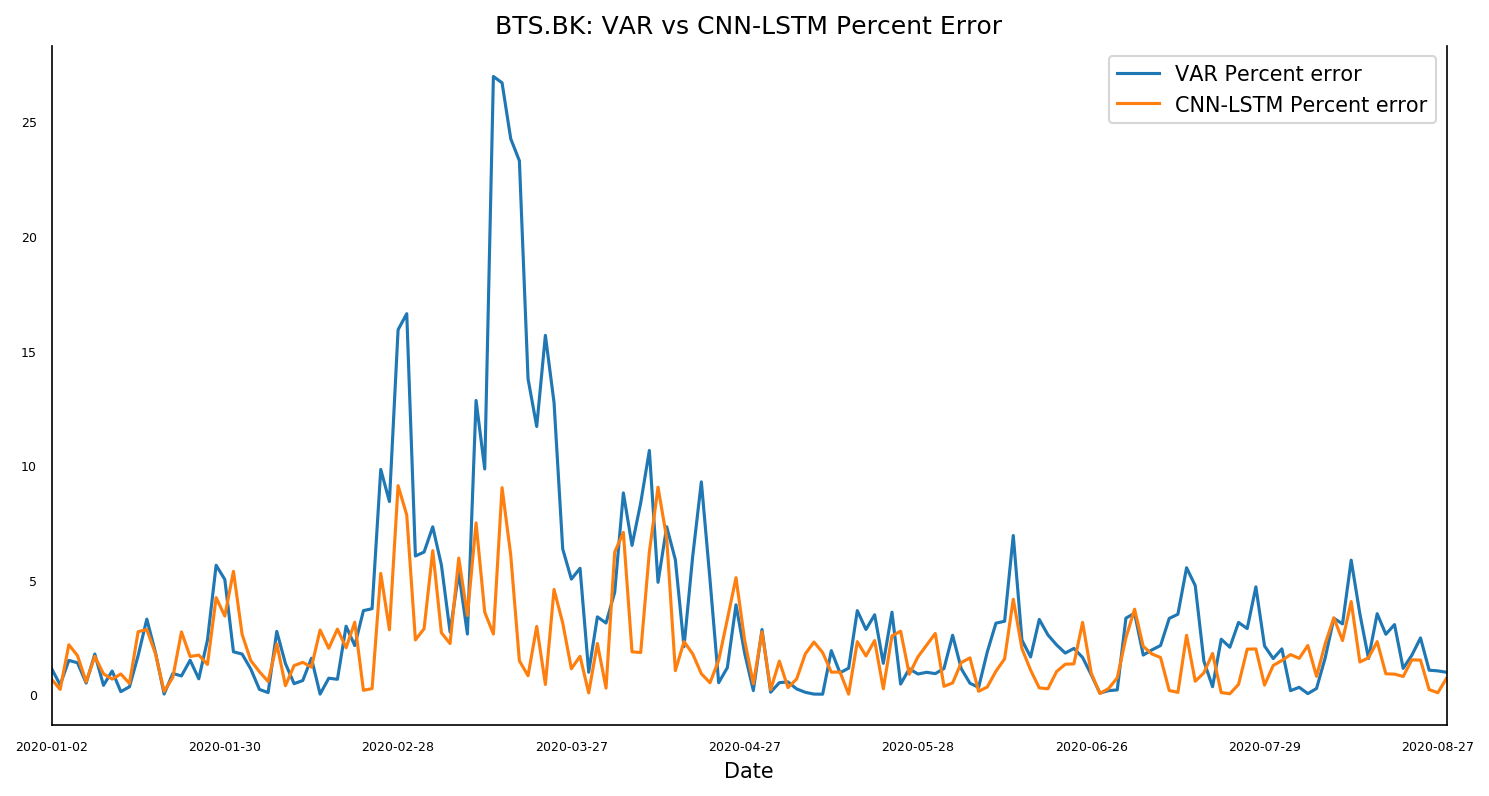

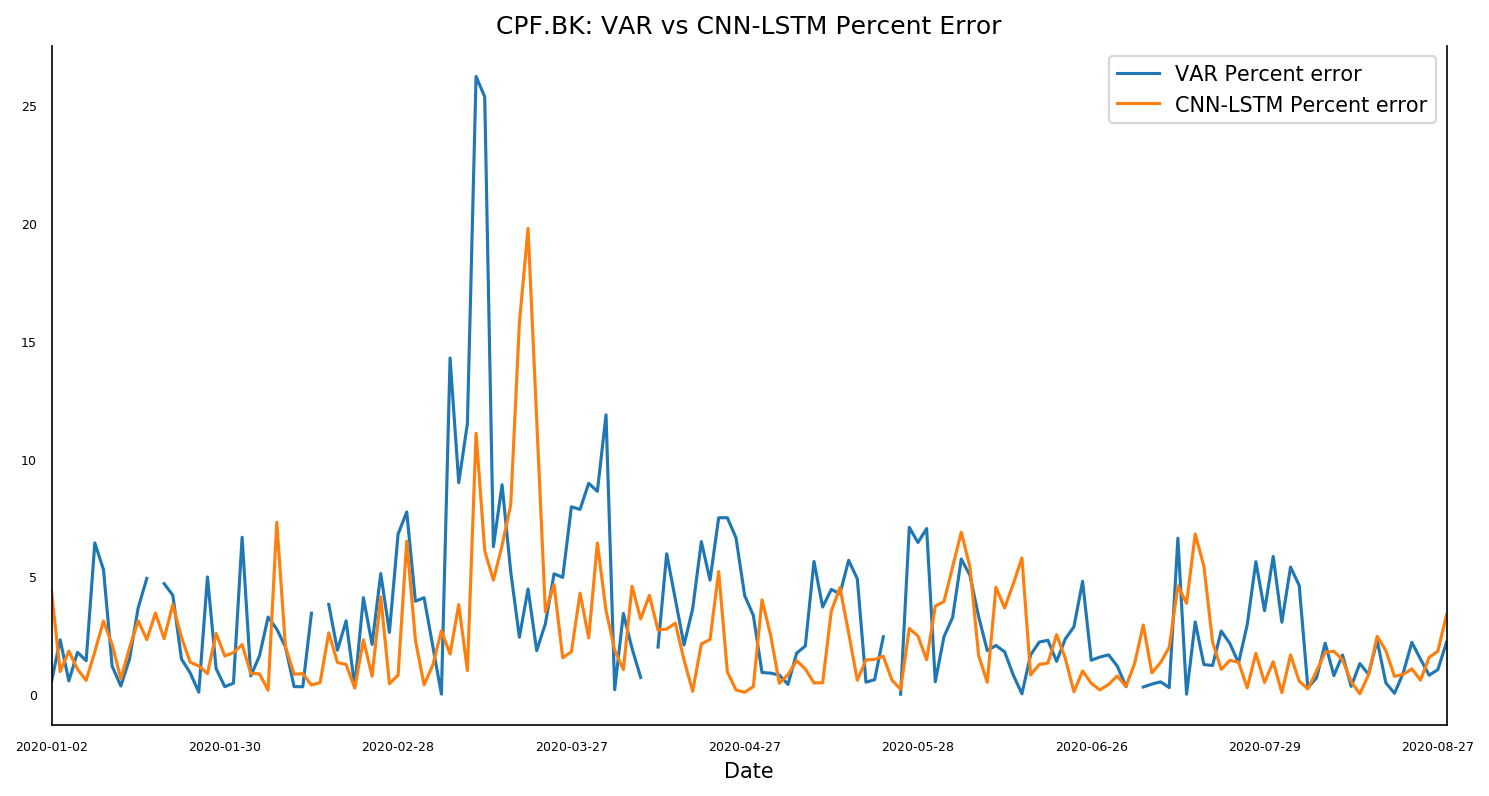

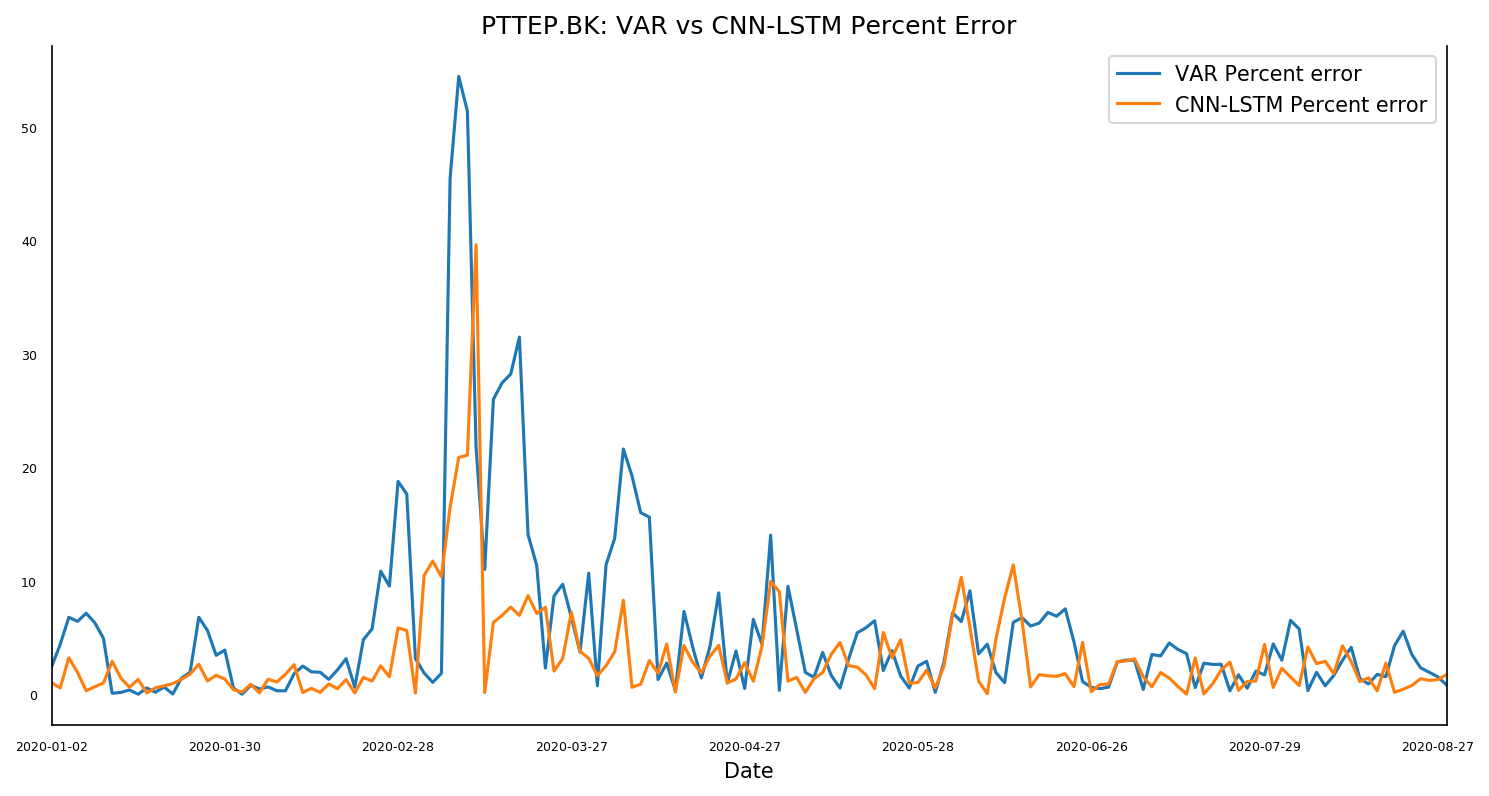

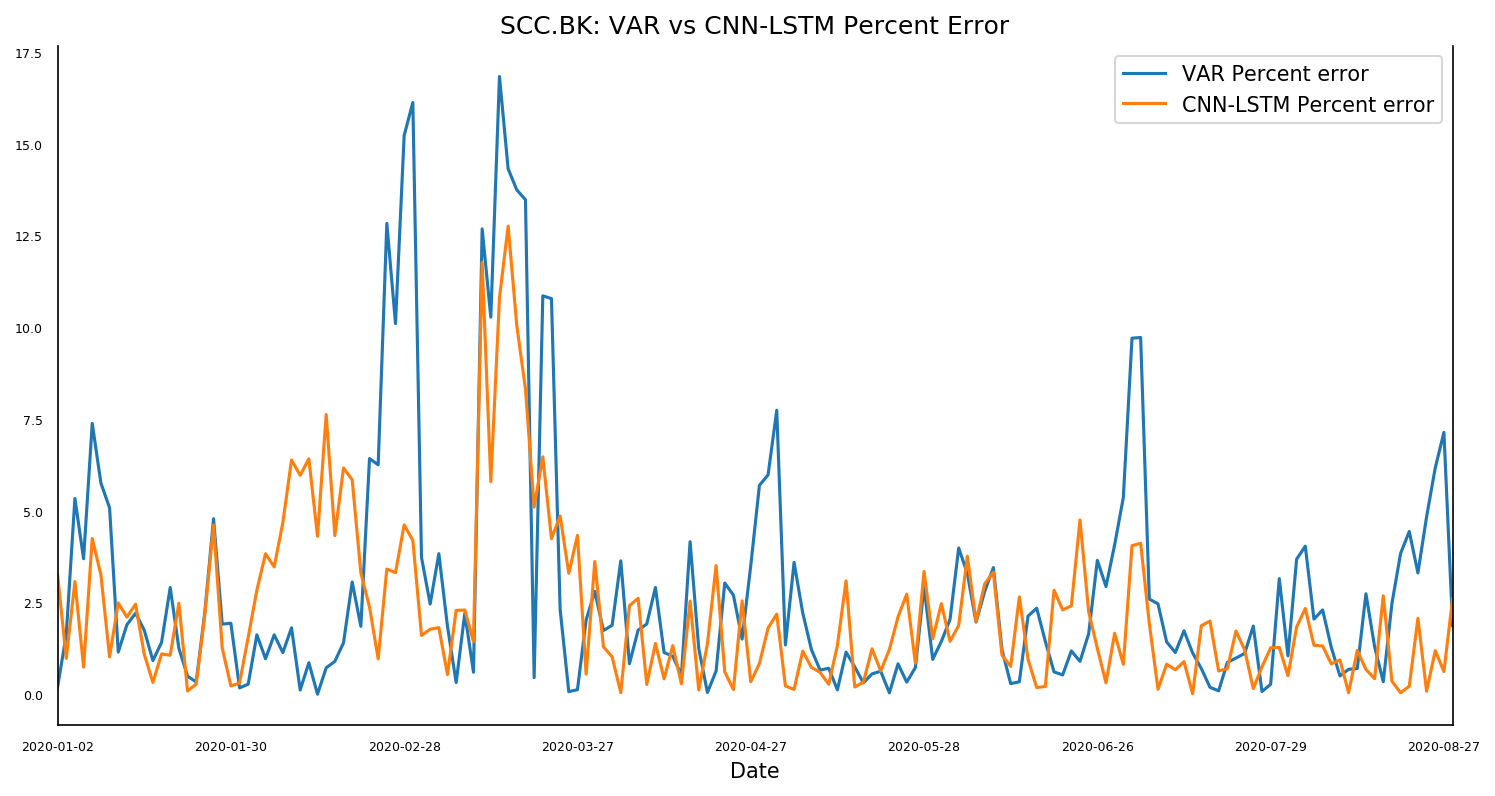

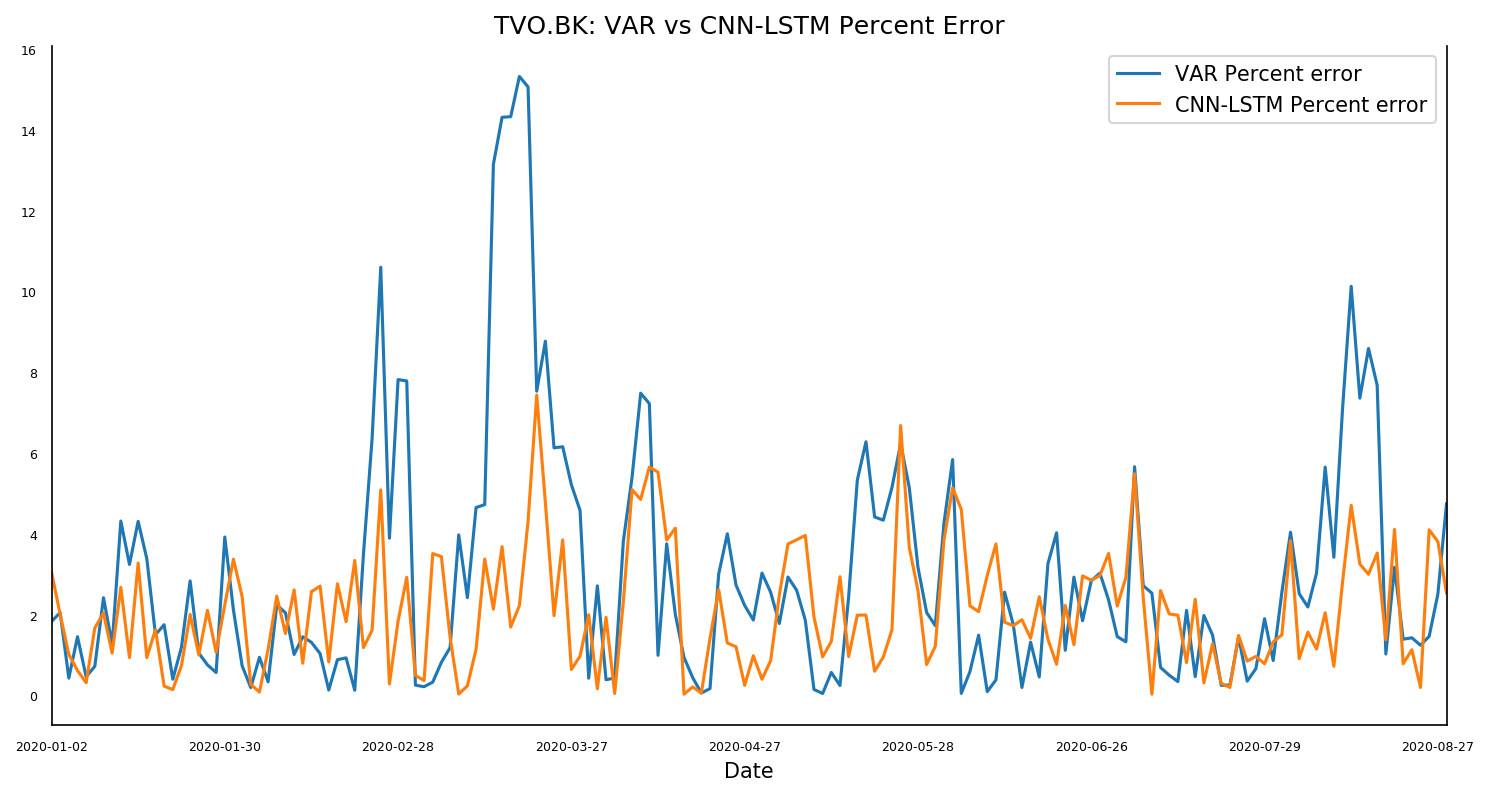

In [182]:
for i in list_of_stock :
    fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(12,6))
    error_percentage_plot[str(i)+' Percent Error (VAR)'].plot(legend=True,label='VAR Percent error' ).autoscale(axis='x',tight=True);
    error_percentage_plot[str(i)+' Percent Error (CNN-LSTM)'].plot(legend=True ,label='CNN-LSTM Percent error').autoscale(axis='x',tight=True);
    axes.set_title(i+'.BK' + ": VAR vs CNN-LSTM Price Error (%)")
    axes.xaxis.set_ticks_position('none')
    axes.yaxis.set_ticks_position('none')
    axes.spines["top"].set_alpha(0)
    axes.tick_params(labelsize=6)

# Trend

## Plot Trend

In [140]:
BTS_trend = BTS_VAR[['BTS.BK_forecast']].join(BTS_cnn_lstm[['Forcast']]).join(BTS_cnn_lstm[['Actuals']]).rolling(7).mean()
CPF_trend = CPF_VAR[['CPF.BK_forecast']].join(CPF_cnn_lstm[['Forcast']]).join(CPF_cnn_lstm[['Actuals']]).rolling(7).mean()
PTTEP_trend = PTTEP_VAR[['PTTEP.BK_forecast']].join(PTTEP_cnn_lstm[['Forcast']]).join(PTTEP_cnn_lstm[['Actuals']]).rolling(7).mean()
SCC_trend = SCC_VAR[['SCC.BK_forecast']].join(SCC_cnn_lstm[['Forcast']]).join(SCC_cnn_lstm[['Actuals']]).rolling(7).mean()
TVO_trend = TVO_VAR[['TVO.BK_forecast']].join(TVO_cnn_lstm[['Forcast']]).join(TVO_cnn_lstm[['Actuals']]).rolling(7).mean()

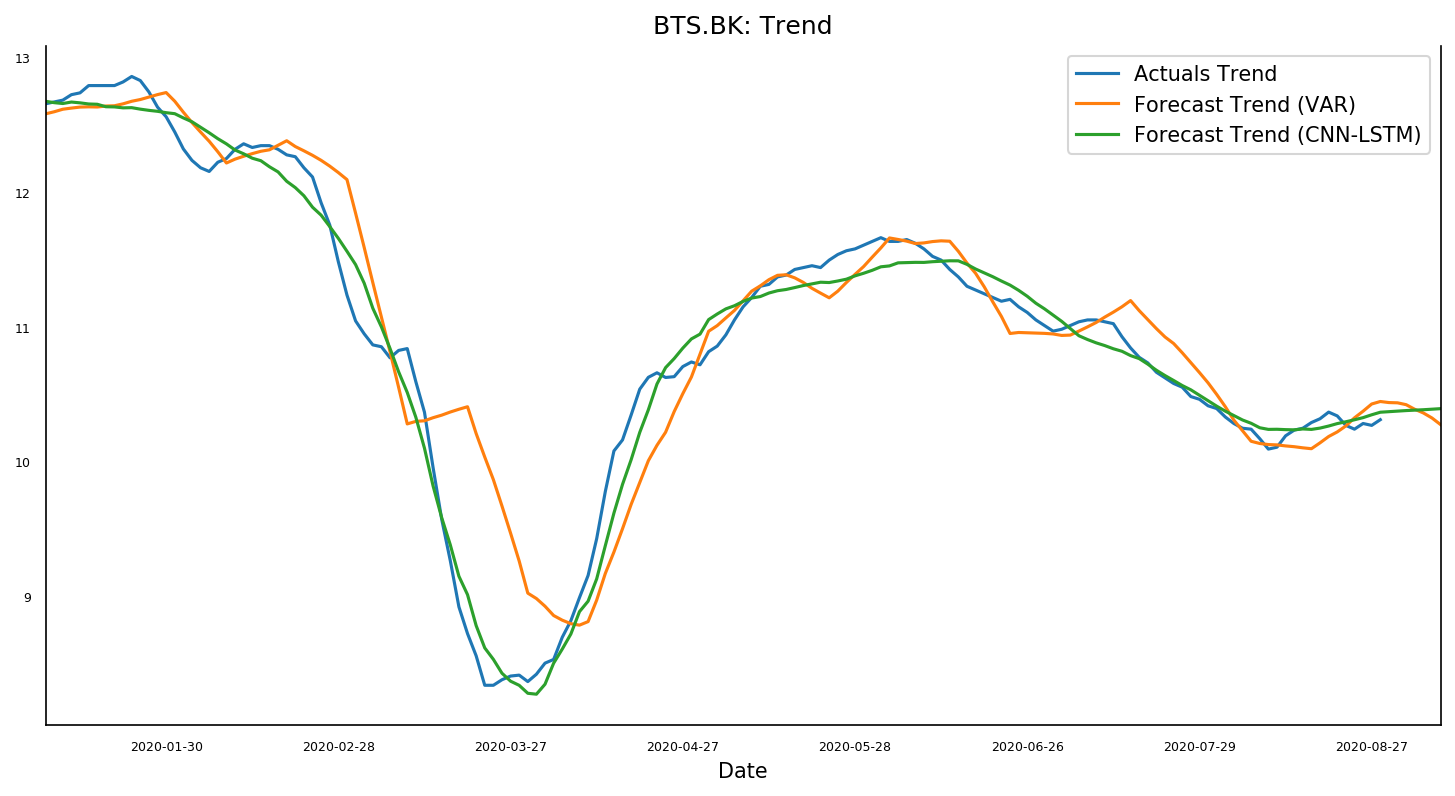

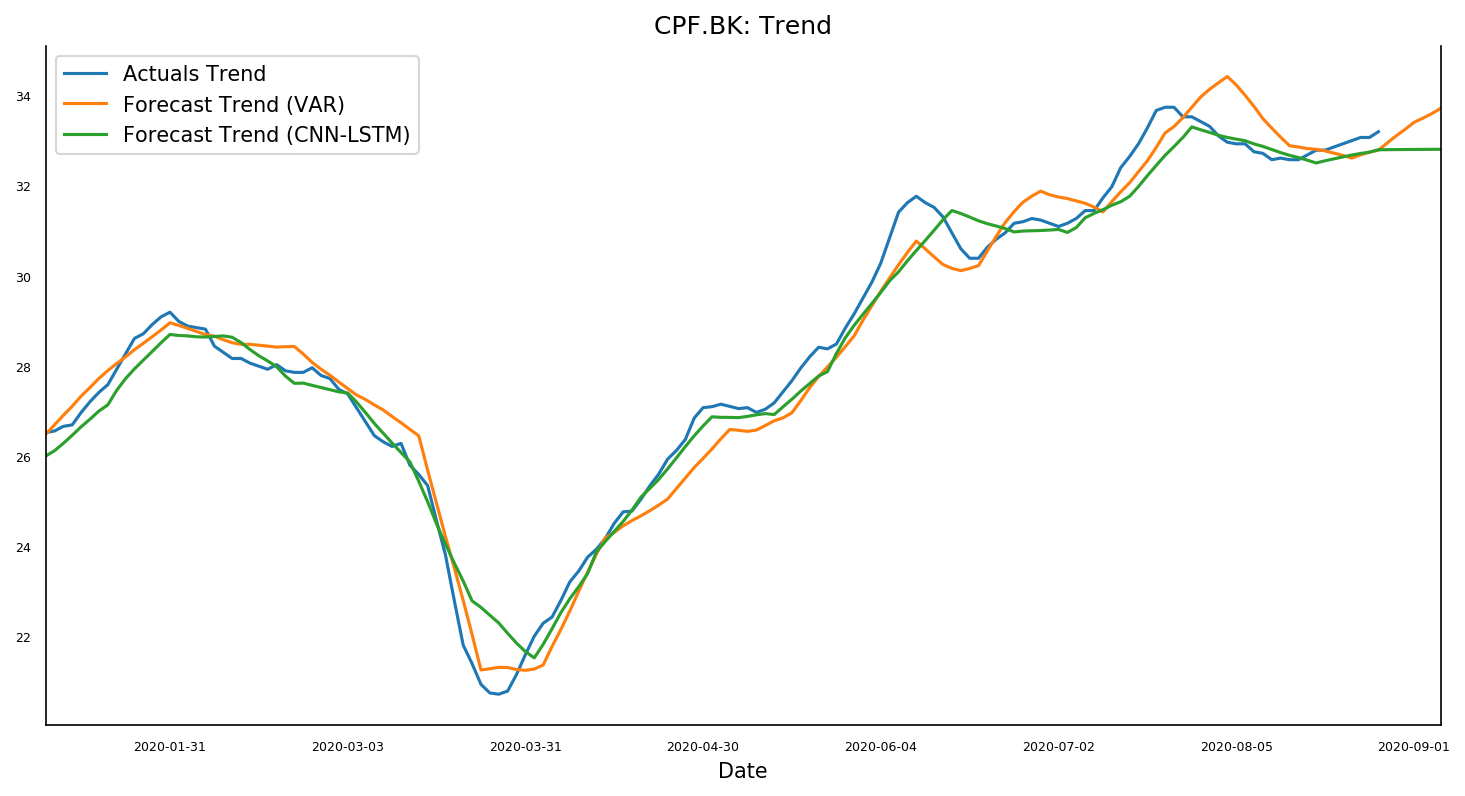

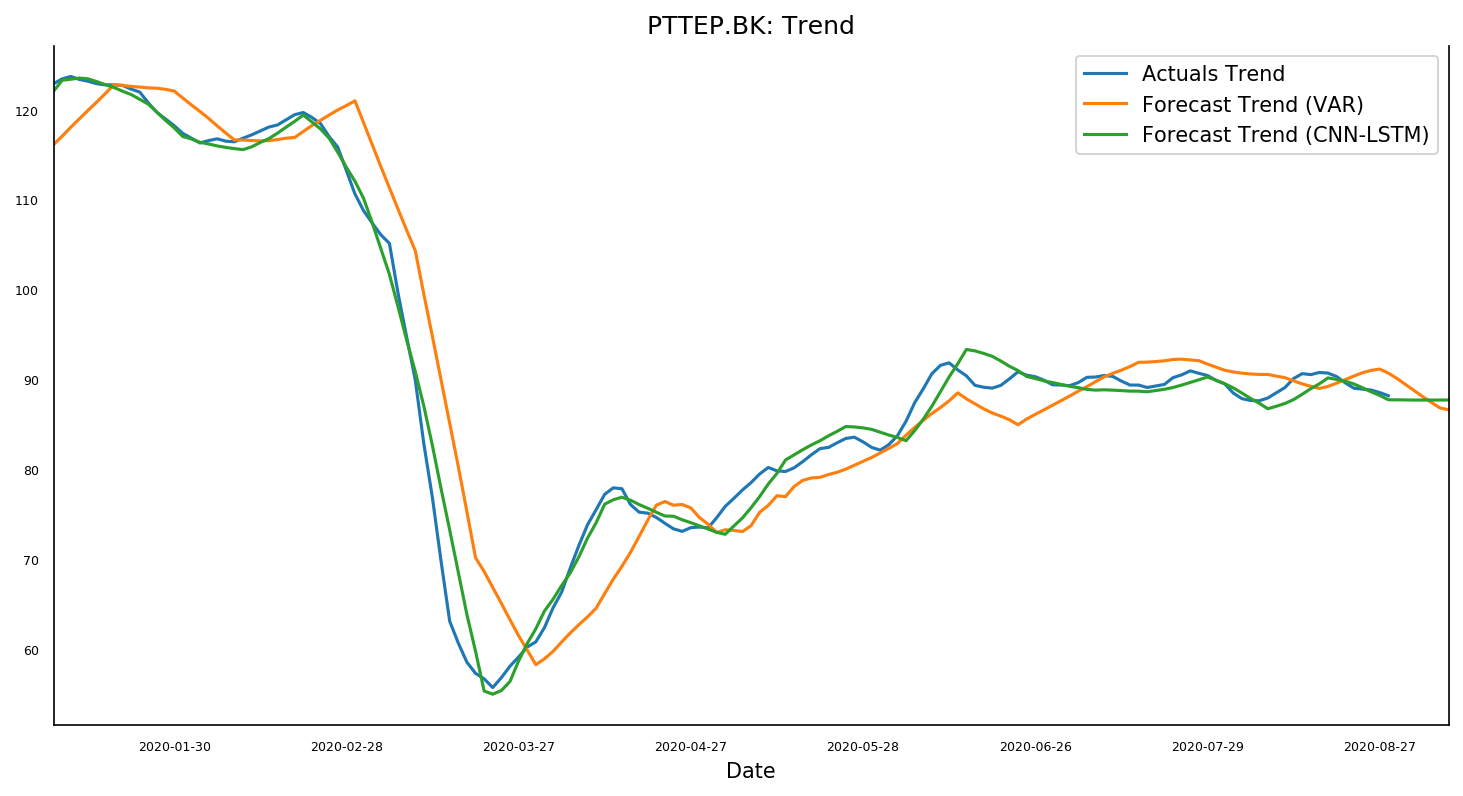

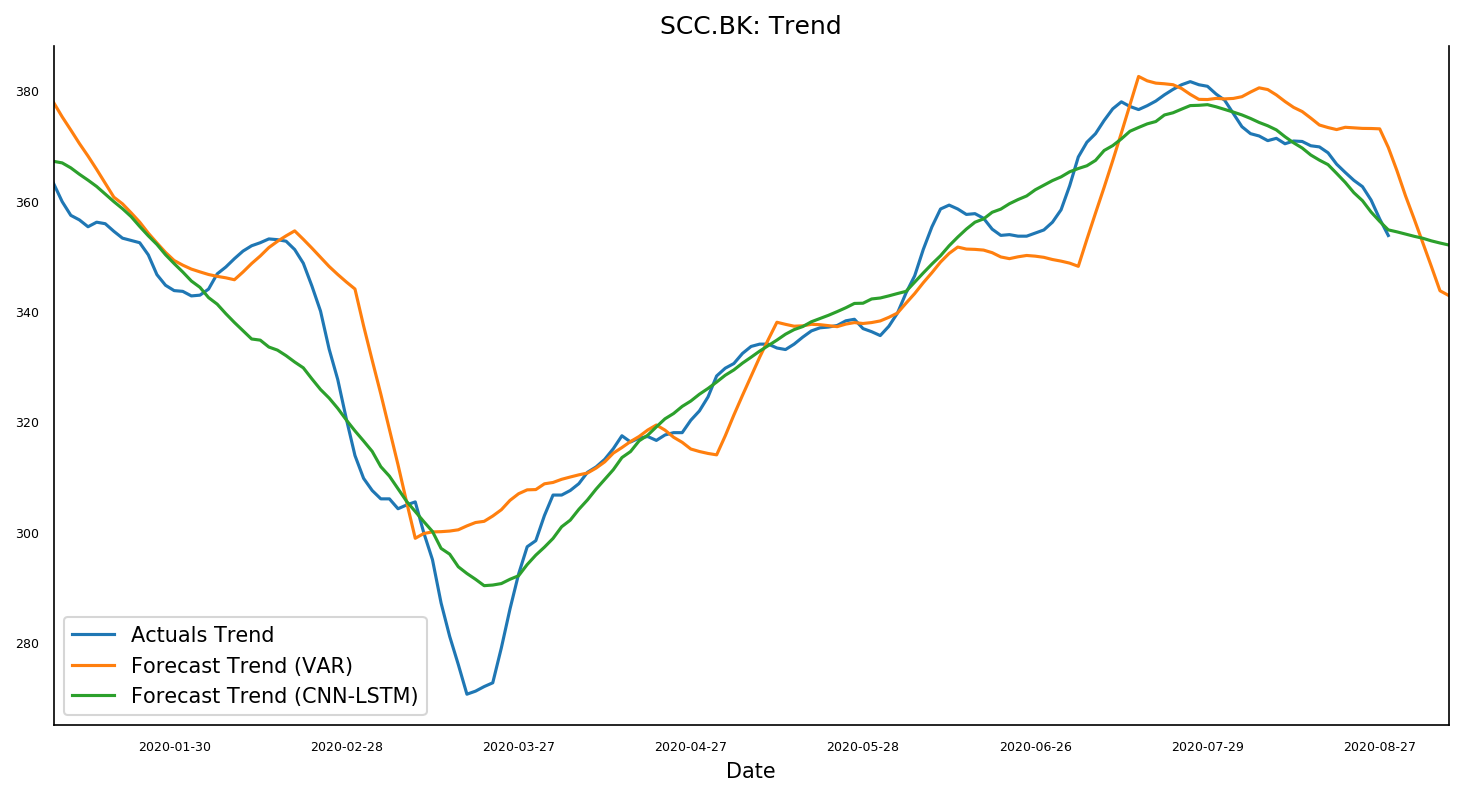

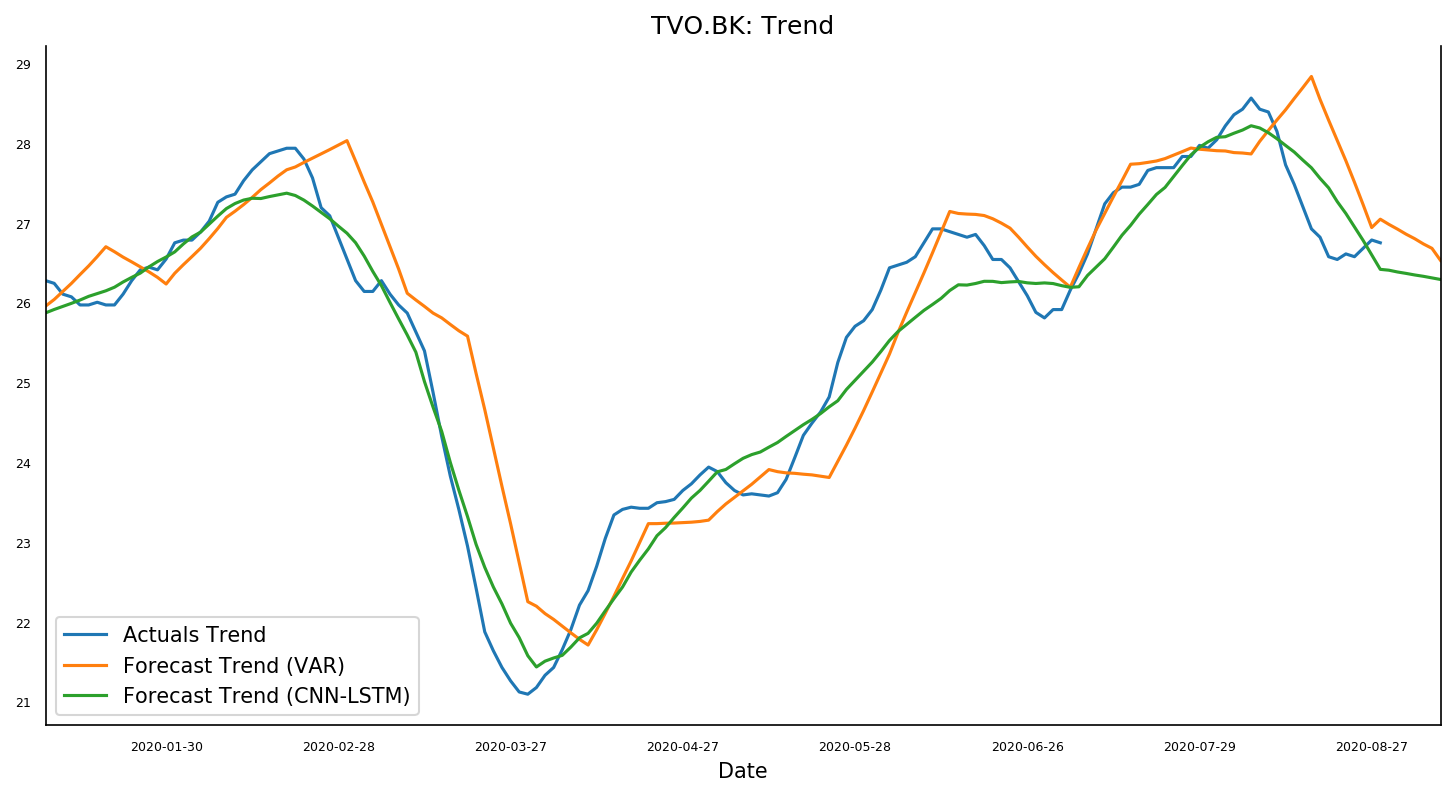

In [143]:
for i in list_of_stock :
    fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(12,6))
    locals()[str(i)+'_trend']['Actuals'].plot(legend=True,label='Actuals Trend' ).autoscale(axis='x',tight=True);
    locals()[str(i)+'_trend'][i+'.BK_forecast'].plot(legend=True,label='Forecast Trend (VAR)' ).autoscale(axis='x',tight=True);
    locals()[str(i)+'_trend']['Forcast'].plot(legend=True,label='Forecast Trend (CNN-LSTM)' ).autoscale(axis='x',tight=True);
    axes.set_title(i+'.BK' + ': Trend')
    axes.xaxis.set_ticks_position('none')
    axes.yaxis.set_ticks_position('none')
    axes.spines["top"].set_alpha(0)
    axes.tick_params(labelsize=6)

## Plot error trend

In [172]:
# def cal_error_trend(stock):
for stock in list_of_stock:
    VAR = pd.DataFrame((np.abs(locals()[str(stock)+'_trend'][str(stock)+'.BK_forecast']-locals()[str(stock)+'_trend']['Actuals'])/np.abs(locals()[str(stock)+'_trend']['Actuals']))*100,columns=['Trend(VAR) Percent Error'])
    CL = pd.DataFrame((np.abs(locals()[str(stock)+'_trend']['Forcast']-locals()[str(stock)+'_trend']['Actuals'])/np.abs(locals()[str(stock)+'_trend']['Actuals']))*100,columns=['Trend(CNN-LSTM) Percent Error'])
    locals()[str(stock)+'_trend_error'] = VAR.join(CL)


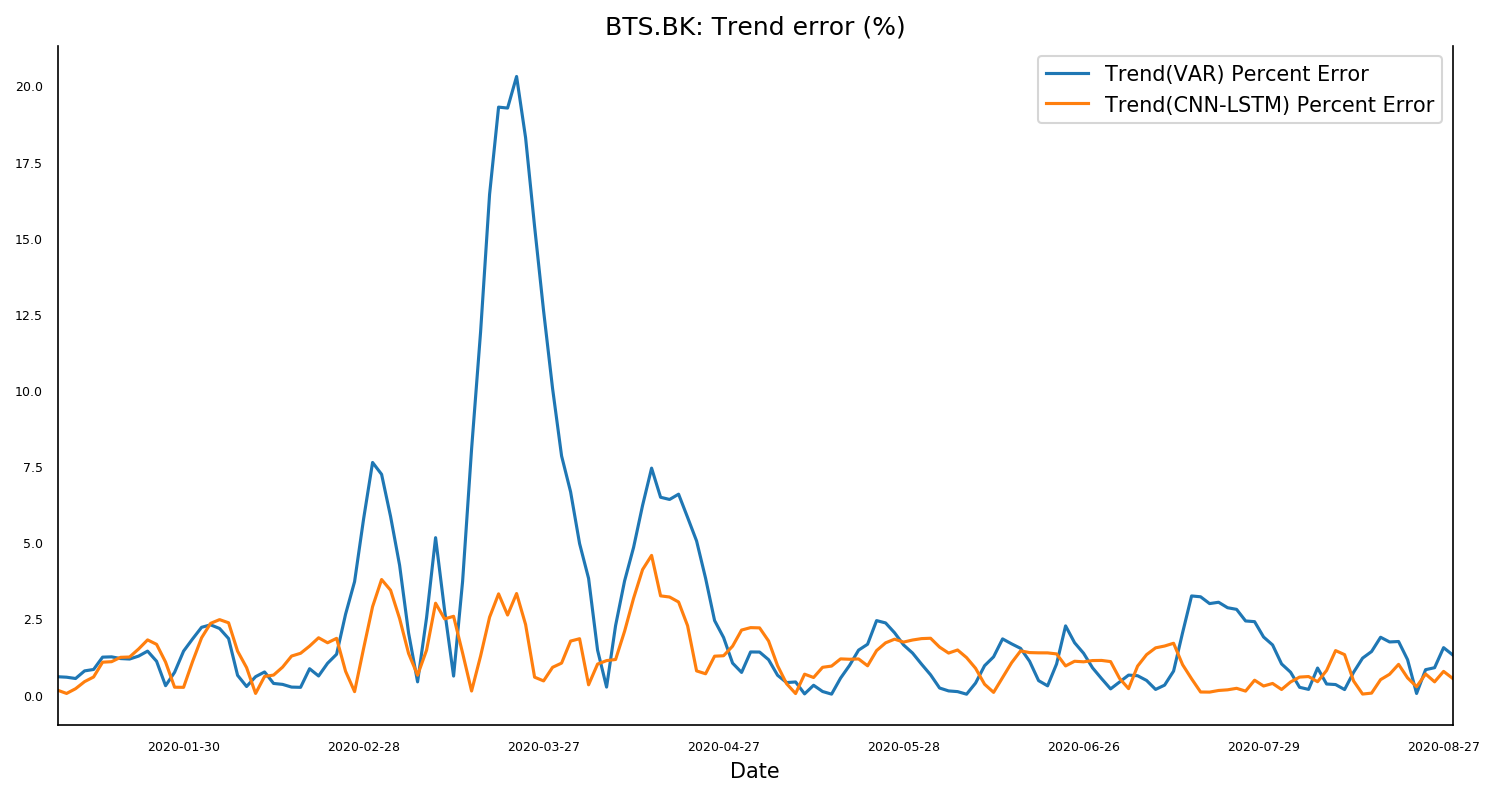

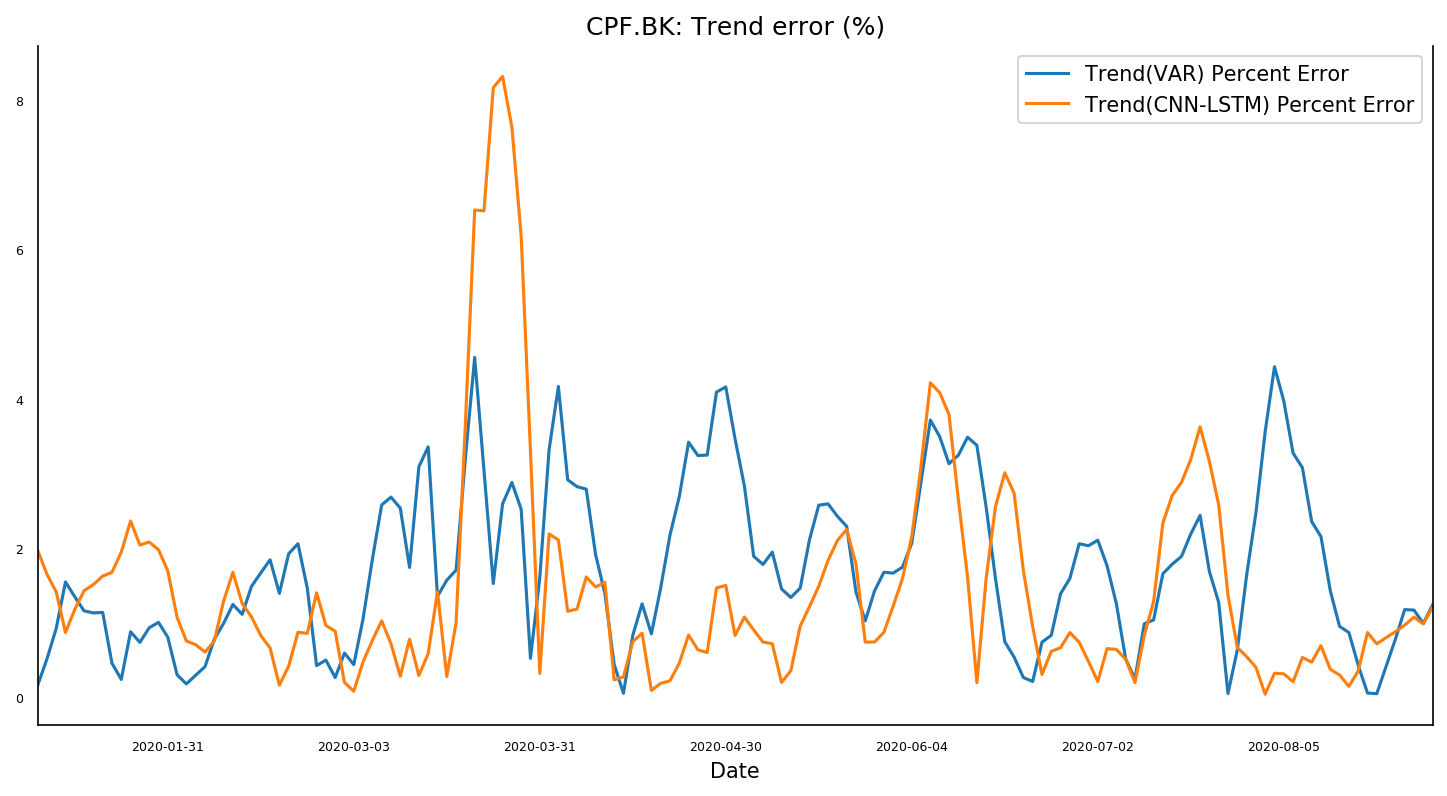

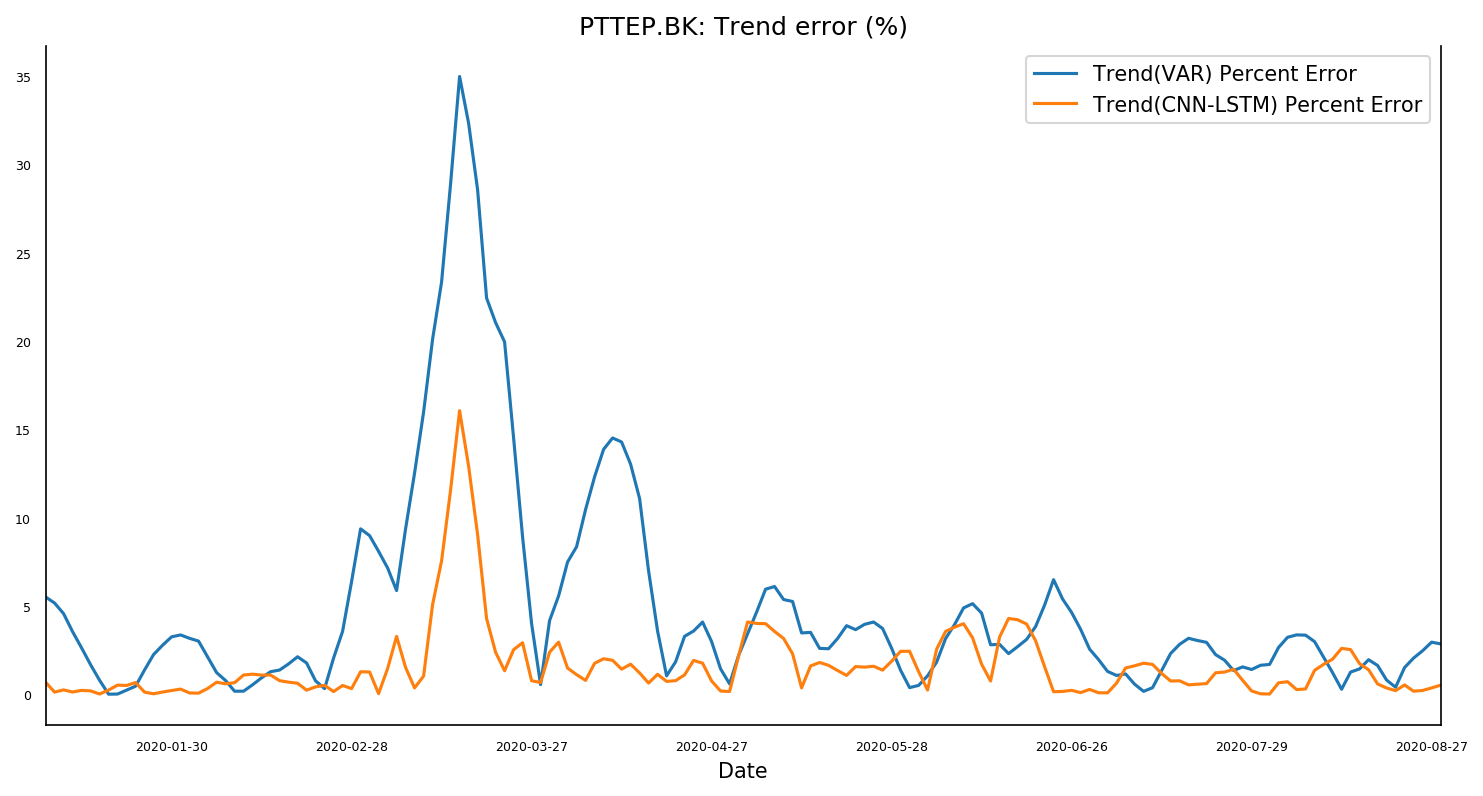

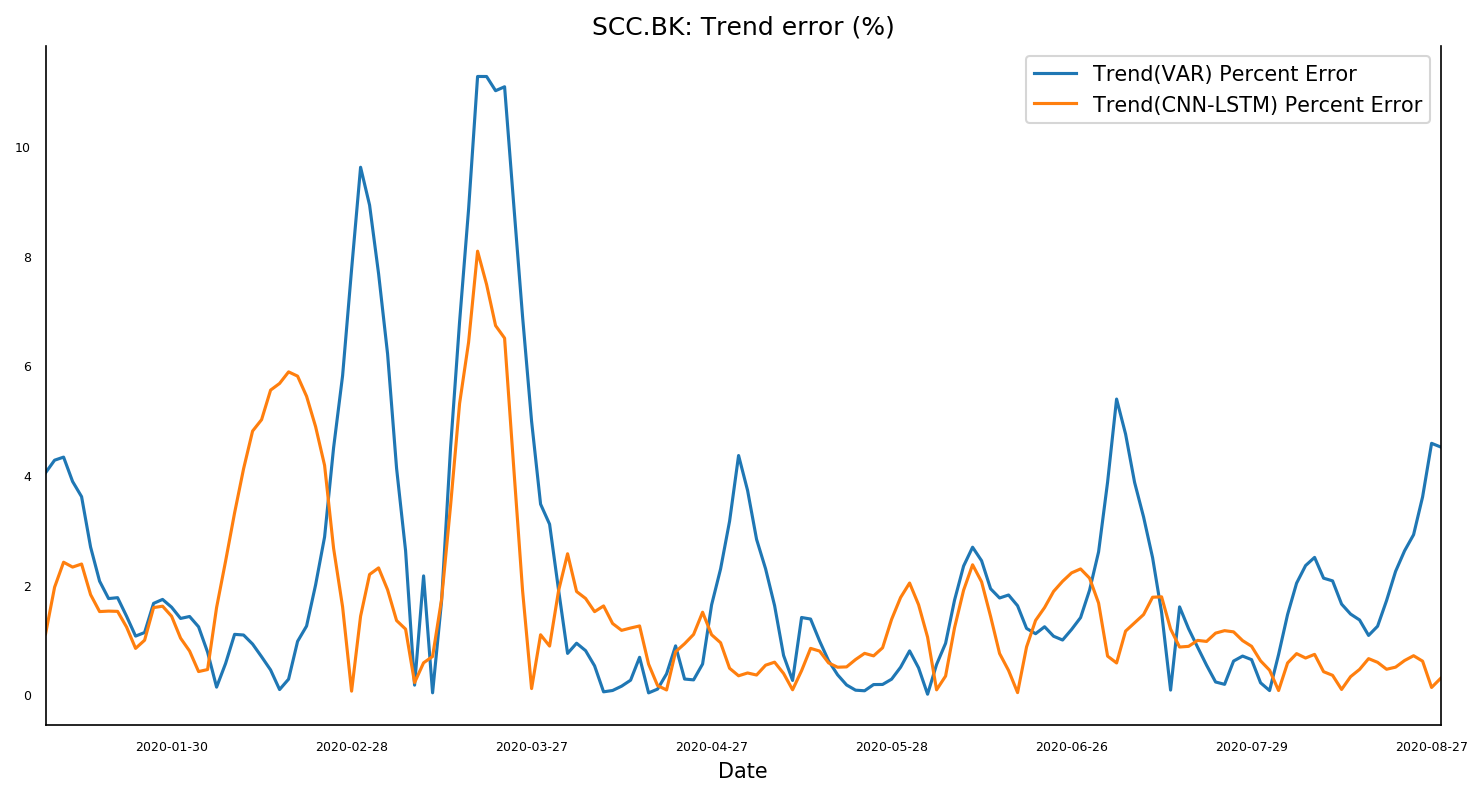

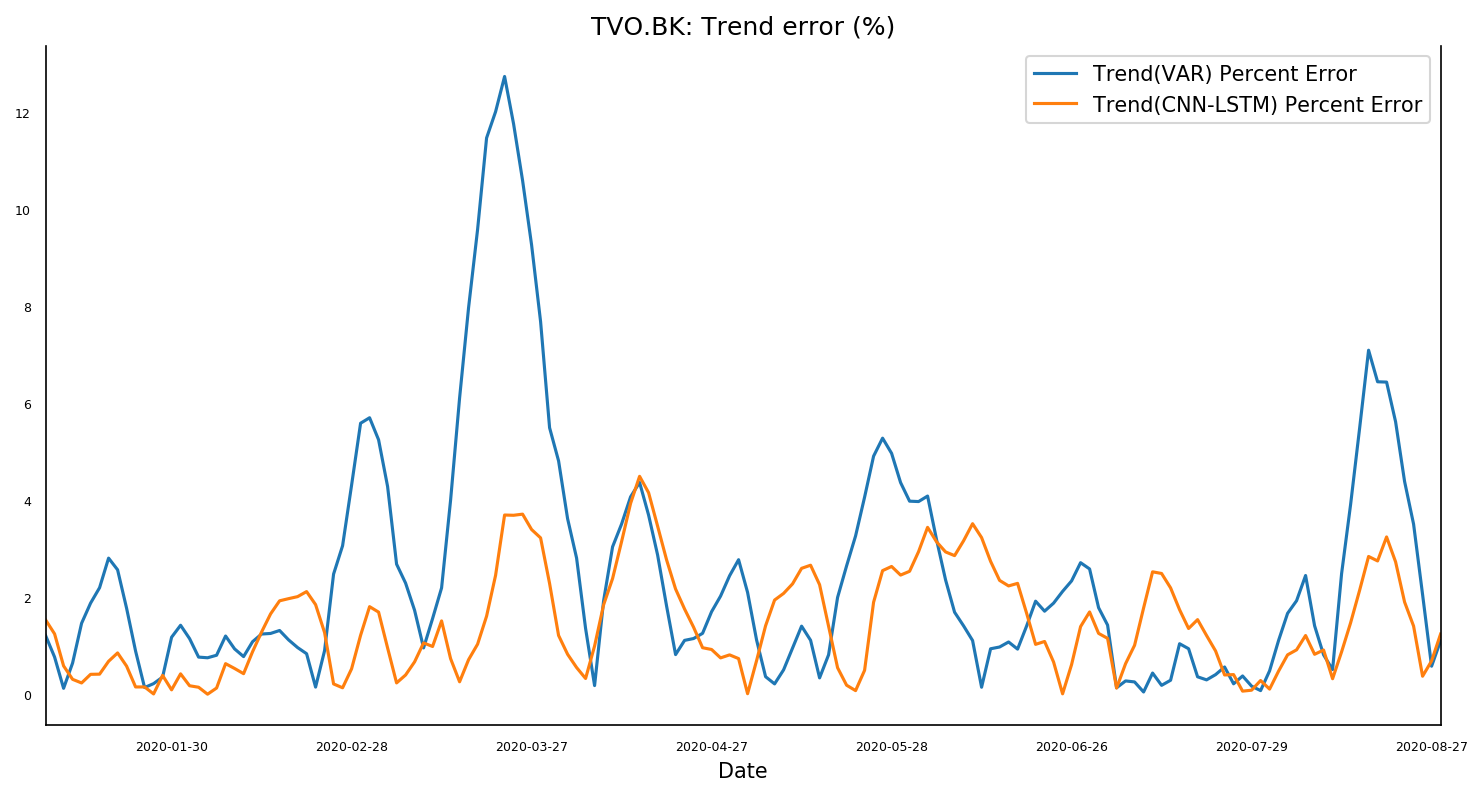

In [184]:
for i in list_of_stock :
    fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(12,6))
    locals()[str(i)+'_trend_error']['Trend(VAR) Percent Error'].plot(legend=True,label='Trend(VAR) Percent Error' ).autoscale(axis='x',tight=True);
    locals()[str(i)+'_trend_error']['Trend(CNN-LSTM) Percent Error'].plot(legend=True,label='Trend(CNN-LSTM) Percent Error' ).autoscale(axis='x',tight=True);
    axes.set_title(i+'.BK' + ': Trend error (%)')
    axes.xaxis.set_ticks_position('none')
    axes.yaxis.set_ticks_position('none')
    axes.spines["top"].set_alpha(0)
    axes.tick_params(labelsize=6)

# Save file

In [1020]:
# # predict 1 day (CNN-LSTM)
# BTSplot_cnn_lstm.to_csv('BTSplot_cnn_lstm.csv')
# CPFplot_cnn_lstm.to_csv('CPFplot_cnn_lstm.csv')
# PTTEPplot_cnn_lstm.to_csv('PTTEPplot_cnn_lstm.csv')
# SCCplot_cnn_lstm.to_csv('SCCplot_cnn_lstm.csv')
# TVOplot_cnn_lstm.to_csv('TVOplot_cnn_lstm.csv')

In [215]:
# # predict 1 day (CNN-LSTM) 200 epoch
# BTSplot_cnn_lstm.to_csv('BTSplot_cnn_lstm200_1d.csv')
# CPFplot_cnn_lstm.to_csv('CPFplot_cnn_lstm200_1d.csv')
# PTTEPplot_cnn_lstm.to_csv('PTTEPplot_cnn_lstm200_1d.csv')
# SCCplot_cnn_lstm.to_csv('SCCplot_cnn_lstm200_1d.csv')
# TVOplot_cnn_lstm.to_csv('TVOplot_cnn_lstm200_1d.csv')

In [368]:
# # predict 7 day (CNN-LSTM) 400 epoch
# BTSplot_cnn_lstm.to_csv('BTSplot_cnn_lstm400_7d.csv')
# CPFplot_cnn_lstm.to_csv('CPFplot_cnn_lstm400_7d.csv')
# PTTEPplot_cnn_lstm.to_csv('PTTEPplot_cnn_lstm400_7d.csv')
# SCCplot_cnn_lstm.to_csv('SCCplot_cnn_lstm400_7d.csv')
# TVOplot_cnn_lstm.to_csv('TVOplot_cnn_lstm400_7d.csv')

In [146]:
# # predict 1 day (VAR)
# BTS_prediction_n[['BTS.BK_forecast']].join(BTS_testslicing[['BTS.BK']]).to_csv('BTSplot_VAR_1d.csv')
# CPF_prediction_n[['CPF.BK_forecast']].join(CPF_testslicing[['CPF.BK']]).to_csv('CPFplot_VAR_1d.csv')
# PTTEP_prediction_n[['PTTEP.BK_forecast']].join(PTTEP_testslicing[['PTTEP.BK']]).to_csv('PTTEPplot_VAR_1d.csv')
# SCC_prediction_n[['SCC.BK_forecast']].join(SCC_testslicing[['SCC.BK']]).to_csv('SCCplot_VAR_1d.csv')
# TVO_prediction_n[['TVO.BK_forecast']].join(TVO_testslicing[['TVO.BK']]).to_csv('TVOplot_VAR_1d.csv')

In [520]:
# # predict 7 day (VAR)
# BTS_prediction_n[['BTS.BK_forecast']].join(BTS_testslicing[['BTS.BK']]).to_csv('BTSplot_VAR_13e7d.csv')
# CPF_prediction_n[['CPF.BK_forecast']].join(CPF_testslicing[['CPF.BK']]).to_csv('CPFplot_VAR_13e7d.csv')
# PTTEP_prediction_n[['PTTEP.BK_forecast']].join(PTTEP_testslicing[['PTTEP.BK']]).to_csv('PTTEPplot_VAR_13e7d.csv')
# SCC_prediction_n[['SCC.BK_forecast']].join(SCC_testslicing[['SCC.BK']]).to_csv('SCCplot_VAR_13e7d.csv')
# TVO_prediction_n[['TVO.BK_forecast']].join(TVO_testslicing[['TVO.BK']]).to_csv('TVOplot_VAR_13e7d.csv')

In [186]:
# Price Error
error_percentage_plot.to_csv('Plot_Error.csv')

In [189]:
# Trend
BTS_trend.to_csv('BTS_trend.csv')
CPF_trend.to_csv('CPF_trend.csv')
PTTEP_trend.to_csv('PTTEP_trend.csv')
SCC_trend.to_csv('SCC_trend.csv')
TVO_trend.to_csv('TVO_trend.csv')

In [190]:
# Trend Error
BTS_trend_error.to_csv('BTS_trend_error.csv')
CPF_trend_error.to_csv('CPF_trend_error.csv')
PTTEP_trend_error.to_csv('PTTEP_trend_error.csv')
SCC_trend_error.to_csv('SCC_trend_error.csv')
TVO_trend_error.to_csv('TVO_trend_error.csv')

# Web Test

In [169]:

app = JupyterDash(__name__)

colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}
pos = {
    'align-content' : 'justify-content'
}
app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Stock Price and Trend Prediction',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),

#     html.Div(children='Select your stock', style={
# #         'textAlign': 'center',
#         'color': colors['text']
#     }),
#     html.Button('VAR Model', id='VAR-val', n_clicks=0),
#     html.Button('CNN+LSTM Model', id='CNN+LSTM-val', n_clicks=0),
#     html.Div(id='container-button'),
        dcc.Dropdown(
            id="model",
            options=[
                {'label': 'VAR', 'value': 'VAR'},
                {'label': 'CNN-LSTM', 'value': 'CNN-LSTM'},
            ],
            value='VAR',
            clearable=False
        ),
        dcc.Dropdown(
            id="ticker",
            options=[
                {'label': 'BTS', 'value': 'BTS'},
                {'label': 'CPF', 'value': 'CPF'},
                {'label': 'PTTEP', 'value' : 'PTTEP'},
                {'label': 'SCC', 'value': 'SCC'},
                {'label': 'TVO', 'value': 'TVO'}
            ],
            value='BTS',
            clearable=False
        ),

    # #     html.Div(id='dd-output-container')
    # #     dcc.Graph(
    # #         id='example-graph-2',
    # #         figure=BTS_plot
    # #     )
    # #     html.Div(children='Select your stock', style={
    # #         'textAlign': 'center',
    # #         'color': colors['text']
    # #     }),

        dcc.Graph(id="time-series-chart"
                 ),
        html.Div(id='indic',
                style={
                'color': colors['text']
            }),
        html.Div(id='mae',
                style={
                'color': colors['text']
            }),
        html.Div(id='rmse',
                style={
                'color': colors['text']
            }),
        html.Div(id='mape',
                style={
                'color': colors['text']
            }),
#         ])
])


# @app.callback(Output('container-button', 'children'),
#               Input('VAR-val', 'n_clicks'),
#               Input('CNN+LSTM-val', 'n_clicks'),
# #               Input("ticker", "value"),
# )
# def displayClick(btn1, btn2):
#     changed_id = [p['prop_id'] for p in dash.callback_context.triggered][0]
#     if 'VAR-val' in changed_id:
#         msg = 'Button 1 was most recently clicked'
#         return  html.Div(msg)
#     elif 'CNN+LSTM-val' in changed_id:
#         msg = 'Button 1 was most recently clicked'
#         return  html.Div(msg)

               
@app.callback(
    Output("time-series-chart", "figure"), 
    Input("ticker", "value"),
)
def display_time_series(ticker):
    if ticker == 'BTS':
        return BTS_plot
    elif ticker == 'CPF':
        return CPF_plot
    elif ticker == 'PTTEP':
        return PTTEP_plot
    elif ticker == 'SCC':
        return SCC_plot
    elif ticker == 'TVO':
        return TVO_plot
    


@app.callback(
    Output("indic", "children"),
    Input("ticker", "value")
)
def name(ticker):
    return ('Forecast Accuracy of : {} stock'
            .format(ticker))

# @app.callback(
#     Output("mae", "children"),
#     Input("ticker", "value")
# )
# def mae(ticker):
#     return ('mae (Mean Absolute Error) จำนวนเงินที่คลาดเคลื่อนจากการทำนายแบบหยาบ(+ - )  :  {:.4}\n'
#             .format(globals()[ticker+'_accuracy_prod']['mae (Mean Absolute Error)']))
            
@app.callback(
    Output("rmse", "children"),
    Input("ticker", "value")
)
def rmse(ticker):
    return ('rmse (Root Mean Square Error) จำนวนเงินที่คลาดเคลื่อนจากการทำนาย  :  +- {:.4} บาท\n'
            .format(globals()[ticker+'_accuracy_prod']['rmse (Root Mean Square Error)']))
            
@app.callback(
    Output("mape", "children"),
    Input("ticker", "value")
)
def mape(ticker):
    return ('mape (Mean absolute percentage error) เปอร์เซ็นความคลาดเคลื่อนจากการทำนาย  :  {:.4} %\n'
            .format(globals()[ticker+'_accuracy_prod']['mape (Mean absolute percentage error)']))


        
#     return([print(key, value) for key, value in accuracy_prod.items()]
#         print('Forecast Accuracy of: {}\n'.format(ticker))
#     accuracy_prod = forecast_accuracy(BTS_prediction['BTS.BK_forecast'].values, BTS_testslicing['BTS.BK'])
#     for k, v in accuracy_prod.items():
#         print(k, ': ', round(v,4))
           
#     return plt.tight_layout();
#     return BTS_plot
# def update_figure(colorscale):
#     return px.scatter(
#         BTS_prediction_n['BTS.BK_forecast'], x="total_bill", y="tip", color="size",
#         color_continuous_scale=colorscale,
#         render_mode="webgl", title="Tips"
#     )
# if __name__ == '__main__':
app.run_server(debug=True)